##### Copyright 2019 The TensorFlow Authors.

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Image classification with TensorFlow Lite Model Maker

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/lite/tutorials/model_maker_image_classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/tensorflow/blob/master/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/tensorflow/tensorflow/lite/g3doc/tutorials/model_maker_image_classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
  <td>
    <a href="https://tfhub.dev/"><img src="https://www.tensorflow.org/images/hub_logo_32px.png" />See TF Hub model</a>
  </td>
</table>

The [TensorFlow Lite Model Maker library](https://www.tensorflow.org/lite/guide/model_maker) simplifies the process of adapting and converting a TensorFlow neural-network model to particular input data when deploying this model for on-device ML applications.

This notebook shows an end-to-end example that utilizes this Model Maker library to illustrate the adaption and conversion of a commonly-used image classification model to classify flowers on a mobile device.

## Prerequisites

To run this example, we first need to install several required packages, including Model Maker package that in GitHub [repo](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker).

In [2]:
!pip install -q tflite-model-maker

Import the required packages.

In [3]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')

from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

/tmpfs/src/tf_docs_env/lib/python3.7/site-packages/pkg_resources/__init__.py:119: PkgResourcesDeprecationWarning: 0.18ubuntu0.18.04.1 is an invalid version and will not be supported in a future release
  PkgResourcesDeprecationWarning,


/tmpfs/src/tf_docs_env/lib/python3.7/site-packages/numba/core/errors.py:168: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


## Simple End-to-End Example

### Get the data path

Let's get some images to play with this simple end-to-end example. Hundreds of images is a good start for Model Maker while more data could achieve better accuracy.

In [4]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

    16384/228813984 [..............................] - ETA: 1s

  9633792/228813984 [>.............................] - ETA: 1s

 20389888/228813984 [=>............................] - ETA: 1s

 31449088/228813984 [===>..........................] - ETA: 0s

 42246144/228813984 [====>.........................] - ETA: 0s

 52699136/228813984 [=====>........................] - ETA: 0s

 63750144/228813984 [=======>......................] - ETA: 0s

 74719232/228813984 [========>.....................] - ETA: 0s

 85368832/228813984 [==========>...................] - ETA: 0s

 96083968/228813984 [===========>..................] - ETA: 0s

106962944/228813984 [=============>................] - ETA: 0s

118030336/228813984 [==============>...............] - ETA: 0s

128909312/228813984 [===============>..............] - ETA: 0s

139247616/228813984 [=================>............] - ETA: 0s

149839872/228813984 [==================>...........] - ETA: 0s

160235520/228813984 [====================>.........] - ETA: 0s

169132032/228813984 [=====================>........] - ETA: 0s

178741248/228813984 [======================>.......] - ETA: 0s

188579840/228813984 [=======================>......] - ETA: 0s

198598656/228813984 [=========================>....] - ETA: 0s

209166336/228813984 [==========================>...] - ETA: 0s

219734016/228813984 [===========================>..] - ETA: 0s

228818944/228813984 [==============================] - 1s 0us/step


228827136/228813984 [==============================] - 1s 0us/step


You could replace `image_path` with your own image folders. As for uploading data to colab, you could find the upload button in the left sidebar shown in the image below with the red rectangle. Just have a try to upload a zip file and unzip it. The root file path is the current path.

<img src="https://storage.googleapis.com/download.tensorflow.org/models/tflite/screenshots/model_maker_image_classification.png" alt="Upload File" width="800" hspace="100">

If you prefer not to upload your images to the cloud, you could try to run the library locally following the [guide](https://github.com/tensorflow/examples/tree/master/tensorflow_examples/lite/model_maker) in GitHub.

### Run the example
The example just consists of 4 lines of code as shown below, each of which representing one step of the overall process.


Step 1.   Load input data specific to an on-device ML app. Split it into training data and testing data.

In [5]:
data = DataLoader.from_folder(image_path)
train_data, test_data = data.split(0.9)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


Step 2. Customize the TensorFlow model.

In [6]:
model = image_classifier.create(train_data)

INFO:tensorflow:Retraining the models...


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2 (HubKer (None, 1280)              3413024   
_________________________________________________________________
dropout (Dropout)            (None, 1280)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/tmpfs/src/tf_docs_env/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


  1/103 [..............................] - ETA: 5:42 - loss: 1.7399 - accuracy: 0.2500

  4/103 [>.............................] - ETA: 2s - loss: 1.6676 - accuracy: 0.2578  

  6/103 [>.............................] - ETA: 3s - loss: 1.6228 - accuracy: 0.2656

  8/103 [=>............................] - ETA: 3s - loss: 1.5487 - accuracy: 0.3125

 10/103 [=>............................] - ETA: 3s - loss: 1.5029 - accuracy: 0.3438

 12/103 [==>...........................] - ETA: 3s - loss: 1.4538 - accuracy: 0.3828

 14/103 [===>..........................] - ETA: 3s - loss: 1.4142 - accuracy: 0.4107

 16/103 [===>..........................] - ETA: 3s - loss: 1.3691 - accuracy: 0.4434

 18/103 [====>.........................] - ETA: 2s - loss: 1.3306 - accuracy: 0.4722

 20/103 [====>.........................] - ETA: 2s - loss: 1.2891 - accuracy: 0.4969

 22/103 [=====>........................] - ETA: 2s - loss: 1.2492 - accuracy: 0.5241

 24/103 [=====>........................] - ETA: 2s - loss: 1.2140 - accuracy: 0.5495

 26/103 [======>.......................] - ETA: 2s - loss: 1.1901 - accuracy: 0.5637

 28/103 [=======>......................] - ETA: 2s - loss: 1.1627 - accuracy: 0.5792

 30/103 [=======>......................] - ETA: 2s - loss: 1.1393 - accuracy: 0.5969

 32/103 [========>.....................] - ETA: 2s - loss: 1.1226 - accuracy: 0.6055

 34/103 [========>.....................] - ETA: 2s - loss: 1.1022 - accuracy: 0.6195

 36/103 [=========>....................] - ETA: 2s - loss: 1.0843 - accuracy: 0.6311

 38/103 [==========>...................] - ETA: 2s - loss: 1.0667 - accuracy: 0.6414

 40/103 [==========>...................] - ETA: 2s - loss: 1.0545 - accuracy: 0.6469

 42/103 [===========>..................] - ETA: 2s - loss: 1.0434 - accuracy: 0.6533

 44/103 [===========>..................] - ETA: 2s - loss: 1.0303 - accuracy: 0.6634

 46/103 [============>.................] - ETA: 2s - loss: 1.0162 - accuracy: 0.6726

 48/103 [============>.................] - ETA: 1s - loss: 1.0066 - accuracy: 0.6797

 50/103 [=============>................] - ETA: 1s - loss: 0.9966 - accuracy: 0.6850

 52/103 [==============>...............] - ETA: 1s - loss: 0.9869 - accuracy: 0.6905

 54/103 [==============>...............] - ETA: 1s - loss: 0.9759 - accuracy: 0.6956

 56/103 [===============>..............] - ETA: 1s - loss: 0.9678 - accuracy: 0.6998

 58/103 [===============>..............] - ETA: 1s - loss: 0.9599 - accuracy: 0.7053

 60/103 [================>.............] - ETA: 1s - loss: 0.9506 - accuracy: 0.7109

 62/103 [=================>............] - ETA: 1s - loss: 0.9428 - accuracy: 0.7157

 64/103 [=================>............] - ETA: 1s - loss: 0.9348 - accuracy: 0.7212

 66/103 [==================>...........] - ETA: 1s - loss: 0.9286 - accuracy: 0.7249

 68/103 [==================>...........] - ETA: 1s - loss: 0.9235 - accuracy: 0.7279

 70/103 [===================>..........] - ETA: 1s - loss: 0.9176 - accuracy: 0.7321

 72/103 [===================>..........] - ETA: 1s - loss: 0.9169 - accuracy: 0.7322

 74/103 [====================>.........] - ETA: 1s - loss: 0.9154 - accuracy: 0.7331

 76/103 [=====================>........] - ETA: 0s - loss: 0.9104 - accuracy: 0.7373

 78/103 [=====================>........] - ETA: 0s - loss: 0.9064 - accuracy: 0.7400

 80/103 [======================>.......] - ETA: 0s - loss: 0.9004 - accuracy: 0.7445

 82/103 [======================>.......] - ETA: 0s - loss: 0.8965 - accuracy: 0.7462

 84/103 [=======================>......] - ETA: 0s - loss: 0.8923 - accuracy: 0.7481

 86/103 [========================>.....] - ETA: 0s - loss: 0.8871 - accuracy: 0.7518

 88/103 [========================>.....] - ETA: 0s - loss: 0.8806 - accuracy: 0.7560

 90/103 [=========================>....] - ETA: 0s - loss: 0.8765 - accuracy: 0.7583

 92/103 [=========================>....] - ETA: 0s - loss: 0.8761 - accuracy: 0.7592

 94/103 [==========================>...] - ETA: 0s - loss: 0.8716 - accuracy: 0.7623

 96/103 [==========================>...] - ETA: 0s - loss: 0.8678 - accuracy: 0.7650

 98/103 [===========================>..] - ETA: 0s - loss: 0.8640 - accuracy: 0.7663

100/103 [============================>.] - ETA: 0s - loss: 0.8605 - accuracy: 0.7688

102/103 [============================>.] - ETA: 0s - loss: 0.8569 - accuracy: 0.7711

103/103 [==============================] - 7s 35ms/step - loss: 0.8551 - accuracy: 0.7718


Epoch 2/5


  1/103 [..............................] - ETA: 4s - loss: 0.7083 - accuracy: 0.8438

  3/103 [..............................] - ETA: 3s - loss: 0.6530 - accuracy: 0.8958

  5/103 [>.............................] - ETA: 3s - loss: 0.6746 - accuracy: 0.8875

  7/103 [=>............................] - ETA: 3s - loss: 0.6609 - accuracy: 0.8839

  9/103 [=>............................] - ETA: 3s - loss: 0.6500 - accuracy: 0.8889

 11/103 [==>...........................] - ETA: 3s - loss: 0.6601 - accuracy: 0.8892

 13/103 [==>...........................] - ETA: 3s - loss: 0.6653 - accuracy: 0.8870

 15/103 [===>..........................] - ETA: 3s - loss: 0.6592 - accuracy: 0.8896

 17/103 [===>..........................] - ETA: 2s - loss: 0.6583 - accuracy: 0.8934

 19/103 [====>.........................] - ETA: 2s - loss: 0.6549 - accuracy: 0.8964

 21/103 [=====>........................] - ETA: 2s - loss: 0.6543 - accuracy: 0.8929

 23/103 [=====>........................] - ETA: 2s - loss: 0.6524 - accuracy: 0.8954

 25/103 [======>.......................] - ETA: 2s - loss: 0.6482 - accuracy: 0.8988

 27/103 [======>.......................] - ETA: 2s - loss: 0.6494 - accuracy: 0.8981

 29/103 [=======>......................] - ETA: 2s - loss: 0.6472 - accuracy: 0.9009

 31/103 [========>.....................] - ETA: 2s - loss: 0.6504 - accuracy: 0.9002

 33/103 [========>.....................] - ETA: 2s - loss: 0.6477 - accuracy: 0.9025

 35/103 [=========>....................] - ETA: 2s - loss: 0.6500 - accuracy: 0.9009

 37/103 [=========>....................] - ETA: 2s - loss: 0.6513 - accuracy: 0.9003

 39/103 [==========>...................] - ETA: 2s - loss: 0.6543 - accuracy: 0.8990

 41/103 [==========>...................] - ETA: 2s - loss: 0.6559 - accuracy: 0.8963

 43/103 [===========>..................] - ETA: 2s - loss: 0.6570 - accuracy: 0.8939

 45/103 [============>.................] - ETA: 2s - loss: 0.6550 - accuracy: 0.8944

 46/103 [============>.................] - ETA: 2s - loss: 0.6536 - accuracy: 0.8961

 48/103 [============>.................] - ETA: 1s - loss: 0.6520 - accuracy: 0.8965

 50/103 [=============>................] - ETA: 1s - loss: 0.6516 - accuracy: 0.8963

 52/103 [==============>...............] - ETA: 1s - loss: 0.6512 - accuracy: 0.8960

 54/103 [==============>...............] - ETA: 1s - loss: 0.6527 - accuracy: 0.8935

 56/103 [===============>..............] - ETA: 1s - loss: 0.6527 - accuracy: 0.8923

 58/103 [===============>..............] - ETA: 1s - loss: 0.6525 - accuracy: 0.8933

 60/103 [================>.............] - ETA: 1s - loss: 0.6527 - accuracy: 0.8938

 62/103 [=================>............] - ETA: 1s - loss: 0.6502 - accuracy: 0.8952

 64/103 [=================>............] - ETA: 1s - loss: 0.6488 - accuracy: 0.8960

 66/103 [==================>...........] - ETA: 1s - loss: 0.6476 - accuracy: 0.8968

 68/103 [==================>...........] - ETA: 1s - loss: 0.6484 - accuracy: 0.8952

 70/103 [===================>..........] - ETA: 1s - loss: 0.6483 - accuracy: 0.8960

 72/103 [===================>..........] - ETA: 1s - loss: 0.6518 - accuracy: 0.8941

 74/103 [====================>.........] - ETA: 1s - loss: 0.6560 - accuracy: 0.8910

 76/103 [=====================>........] - ETA: 0s - loss: 0.6540 - accuracy: 0.8927

 78/103 [=====================>........] - ETA: 0s - loss: 0.6556 - accuracy: 0.8926

 80/103 [======================>.......] - ETA: 0s - loss: 0.6531 - accuracy: 0.8941

 82/103 [======================>.......] - ETA: 0s - loss: 0.6533 - accuracy: 0.8948

 84/103 [=======================>......] - ETA: 0s - loss: 0.6527 - accuracy: 0.8955

 86/103 [========================>.....] - ETA: 0s - loss: 0.6517 - accuracy: 0.8961

 88/103 [========================>.....] - ETA: 0s - loss: 0.6510 - accuracy: 0.8963

 90/103 [=========================>....] - ETA: 0s - loss: 0.6501 - accuracy: 0.8969

 92/103 [=========================>....] - ETA: 0s - loss: 0.6514 - accuracy: 0.8964

 94/103 [==========================>...] - ETA: 0s - loss: 0.6497 - accuracy: 0.8976

 96/103 [==========================>...] - ETA: 0s - loss: 0.6497 - accuracy: 0.8971

 98/103 [===========================>..] - ETA: 0s - loss: 0.6495 - accuracy: 0.8970

100/103 [============================>.] - ETA: 0s - loss: 0.6497 - accuracy: 0.8956

102/103 [============================>.] - ETA: 0s - loss: 0.6501 - accuracy: 0.8958

103/103 [==============================] - 4s 35ms/step - loss: 0.6503 - accuracy: 0.8956


Epoch 3/5


  1/103 [..............................] - ETA: 3s - loss: 0.6768 - accuracy: 0.8438

  3/103 [..............................] - ETA: 3s - loss: 0.5992 - accuracy: 0.9375

  5/103 [>.............................] - ETA: 3s - loss: 0.6169 - accuracy: 0.9187

  7/103 [=>............................] - ETA: 3s - loss: 0.6187 - accuracy: 0.9196

  9/103 [=>............................] - ETA: 3s - loss: 0.6137 - accuracy: 0.9236

 11/103 [==>...........................] - ETA: 3s - loss: 0.6246 - accuracy: 0.9148

 13/103 [==>...........................] - ETA: 3s - loss: 0.6199 - accuracy: 0.9159

 15/103 [===>..........................] - ETA: 3s - loss: 0.6196 - accuracy: 0.9187

 17/103 [===>..........................] - ETA: 2s - loss: 0.6220 - accuracy: 0.9191

 19/103 [====>.........................] - ETA: 2s - loss: 0.6184 - accuracy: 0.9243

 21/103 [=====>........................] - ETA: 2s - loss: 0.6134 - accuracy: 0.9256

 23/103 [=====>........................] - ETA: 2s - loss: 0.6106 - accuracy: 0.9266

 25/103 [======>.......................] - ETA: 2s - loss: 0.6090 - accuracy: 0.9287

 27/103 [======>.......................] - ETA: 2s - loss: 0.6077 - accuracy: 0.9282

 29/103 [=======>......................] - ETA: 2s - loss: 0.6057 - accuracy: 0.9289

 31/103 [========>.....................] - ETA: 2s - loss: 0.6076 - accuracy: 0.9264

 33/103 [========>.....................] - ETA: 2s - loss: 0.6062 - accuracy: 0.9271

 35/103 [=========>....................] - ETA: 2s - loss: 0.6079 - accuracy: 0.9268

 37/103 [=========>....................] - ETA: 2s - loss: 0.6098 - accuracy: 0.9257

 39/103 [==========>...................] - ETA: 2s - loss: 0.6138 - accuracy: 0.9231

 41/103 [==========>...................] - ETA: 2s - loss: 0.6156 - accuracy: 0.9215

 43/103 [===========>..................] - ETA: 2s - loss: 0.6171 - accuracy: 0.9208

 45/103 [============>.................] - ETA: 1s - loss: 0.6163 - accuracy: 0.9229

 47/103 [============>.................] - ETA: 1s - loss: 0.6137 - accuracy: 0.9235

 49/103 [=============>................] - ETA: 1s - loss: 0.6129 - accuracy: 0.9235

 51/103 [=============>................] - ETA: 1s - loss: 0.6127 - accuracy: 0.9234

 53/103 [==============>...............] - ETA: 1s - loss: 0.6126 - accuracy: 0.9228

 55/103 [===============>..............] - ETA: 1s - loss: 0.6142 - accuracy: 0.9210

 57/103 [===============>..............] - ETA: 1s - loss: 0.6122 - accuracy: 0.9221

 59/103 [================>.............] - ETA: 1s - loss: 0.6149 - accuracy: 0.9211

 61/103 [================>.............] - ETA: 1s - loss: 0.6136 - accuracy: 0.9216

 63/103 [=================>............] - ETA: 1s - loss: 0.6126 - accuracy: 0.9226

 65/103 [=================>............] - ETA: 1s - loss: 0.6112 - accuracy: 0.9240

 67/103 [==================>...........] - ETA: 1s - loss: 0.6119 - accuracy: 0.9235

 69/103 [===================>..........] - ETA: 1s - loss: 0.6113 - accuracy: 0.9235

 71/103 [===================>..........] - ETA: 1s - loss: 0.6120 - accuracy: 0.9239

 73/103 [====================>.........] - ETA: 1s - loss: 0.6163 - accuracy: 0.9208

 75/103 [====================>.........] - ETA: 0s - loss: 0.6185 - accuracy: 0.9183

 77/103 [=====================>........] - ETA: 0s - loss: 0.6173 - accuracy: 0.9192

 79/103 [======================>.......] - ETA: 0s - loss: 0.6180 - accuracy: 0.9181

 81/103 [======================>.......] - ETA: 0s - loss: 0.6169 - accuracy: 0.9186

 83/103 [=======================>......] - ETA: 0s - loss: 0.6180 - accuracy: 0.9183

 85/103 [=======================>......] - ETA: 0s - loss: 0.6170 - accuracy: 0.9184

 87/103 [========================>.....] - ETA: 0s - loss: 0.6151 - accuracy: 0.9199

 89/103 [========================>.....] - ETA: 0s - loss: 0.6145 - accuracy: 0.9199

 91/103 [=========================>....] - ETA: 0s - loss: 0.6143 - accuracy: 0.9196

 93/103 [==========================>...] - ETA: 0s - loss: 0.6150 - accuracy: 0.9197

 95/103 [==========================>...] - ETA: 0s - loss: 0.6159 - accuracy: 0.9194

 97/103 [===========================>..] - ETA: 0s - loss: 0.6156 - accuracy: 0.9201

 99/103 [===========================>..] - ETA: 0s - loss: 0.6160 - accuracy: 0.9198

101/103 [============================>.] - ETA: 0s - loss: 0.6152 - accuracy: 0.9199

103/103 [==============================] - ETA: 0s - loss: 0.6157 - accuracy: 0.9196

103/103 [==============================] - 4s 34ms/step - loss: 0.6157 - accuracy: 0.9196


Epoch 4/5
  1/103 [..............................] - ETA: 3s - loss: 0.6787 - accuracy: 0.8750

  3/103 [..............................] - ETA: 3s - loss: 0.6088 - accuracy: 0.9062

  5/103 [>.............................] - ETA: 3s - loss: 0.6111 - accuracy: 0.9250

  7/103 [=>............................] - ETA: 3s - loss: 0.6211 - accuracy: 0.9196

  9/103 [=>............................] - ETA: 3s - loss: 0.6071 - accuracy: 0.9236

 11/103 [==>...........................] - ETA: 3s - loss: 0.6160 - accuracy: 0.9261

 13/103 [==>...........................] - ETA: 3s - loss: 0.6163 - accuracy: 0.9255

 15/103 [===>..........................] - ETA: 2s - loss: 0.6194 - accuracy: 0.9292

 17/103 [===>..........................] - ETA: 2s - loss: 0.6178 - accuracy: 0.9301

 19/103 [====>.........................] - ETA: 2s - loss: 0.6110 - accuracy: 0.9326

 21/103 [=====>........................] - ETA: 2s - loss: 0.6109 - accuracy: 0.9286

 23/103 [=====>........................] - ETA: 2s - loss: 0.6035 - accuracy: 0.9307

 25/103 [======>.......................] - ETA: 2s - loss: 0.6025 - accuracy: 0.9337

 27/103 [======>.......................] - ETA: 2s - loss: 0.6037 - accuracy: 0.9317

 29/103 [=======>......................] - ETA: 2s - loss: 0.6023 - accuracy: 0.9321

 31/103 [========>.....................] - ETA: 2s - loss: 0.6034 - accuracy: 0.9325

 33/103 [========>.....................] - ETA: 2s - loss: 0.5989 - accuracy: 0.9356

 35/103 [=========>....................] - ETA: 2s - loss: 0.6005 - accuracy: 0.9357

 37/103 [=========>....................] - ETA: 2s - loss: 0.6010 - accuracy: 0.9324

 39/103 [==========>...................] - ETA: 2s - loss: 0.6000 - accuracy: 0.9335

 41/103 [==========>...................] - ETA: 2s - loss: 0.6006 - accuracy: 0.9314

 43/103 [===========>..................] - ETA: 1s - loss: 0.6031 - accuracy: 0.9302

 45/103 [============>.................] - ETA: 1s - loss: 0.6012 - accuracy: 0.9312

 47/103 [============>.................] - ETA: 1s - loss: 0.5991 - accuracy: 0.9315

 49/103 [=============>................] - ETA: 1s - loss: 0.5994 - accuracy: 0.9311

 51/103 [=============>................] - ETA: 1s - loss: 0.5997 - accuracy: 0.9308

 53/103 [==============>...............] - ETA: 1s - loss: 0.6011 - accuracy: 0.9292

 55/103 [===============>..............] - ETA: 1s - loss: 0.5993 - accuracy: 0.9301

 57/103 [===============>..............] - ETA: 1s - loss: 0.5971 - accuracy: 0.9315

 59/103 [================>.............] - ETA: 1s - loss: 0.5976 - accuracy: 0.9317

 61/103 [================>.............] - ETA: 1s - loss: 0.5976 - accuracy: 0.9308

 63/103 [=================>............] - ETA: 1s - loss: 0.5969 - accuracy: 0.9306

 65/103 [=================>............] - ETA: 1s - loss: 0.5952 - accuracy: 0.9322

 67/103 [==================>...........] - ETA: 1s - loss: 0.5958 - accuracy: 0.9319

 69/103 [===================>..........] - ETA: 1s - loss: 0.5964 - accuracy: 0.9312

 71/103 [===================>..........] - ETA: 1s - loss: 0.5966 - accuracy: 0.9318

 73/103 [====================>.........] - ETA: 0s - loss: 0.6003 - accuracy: 0.9298

 75/103 [====================>.........] - ETA: 0s - loss: 0.6012 - accuracy: 0.9300

 77/103 [=====================>........] - ETA: 0s - loss: 0.6005 - accuracy: 0.9306

 79/103 [======================>.......] - ETA: 0s - loss: 0.6001 - accuracy: 0.9308

 81/103 [======================>.......] - ETA: 0s - loss: 0.6001 - accuracy: 0.9313

 83/103 [=======================>......] - ETA: 0s - loss: 0.6006 - accuracy: 0.9315

 85/103 [=======================>......] - ETA: 0s - loss: 0.6008 - accuracy: 0.9312

 87/103 [========================>.....] - ETA: 0s - loss: 0.6007 - accuracy: 0.9307

 89/103 [========================>.....] - ETA: 0s - loss: 0.6000 - accuracy: 0.9312

 91/103 [=========================>....] - ETA: 0s - loss: 0.6004 - accuracy: 0.9310

 93/103 [==========================>...] - ETA: 0s - loss: 0.6021 - accuracy: 0.9301

 95/103 [==========================>...] - ETA: 0s - loss: 0.6032 - accuracy: 0.9299

 97/103 [===========================>..] - ETA: 0s - loss: 0.6035 - accuracy: 0.9294

 99/103 [===========================>..] - ETA: 0s - loss: 0.6038 - accuracy: 0.9290

101/103 [============================>.] - ETA: 0s - loss: 0.6033 - accuracy: 0.9291

103/103 [==============================] - ETA: 0s - loss: 0.6036 - accuracy: 0.9293

103/103 [==============================] - 3s 33ms/step - loss: 0.6036 - accuracy: 0.9293


Epoch 5/5
  1/103 [..............................] - ETA: 3s - loss: 0.6284 - accuracy: 0.8750

  3/103 [..............................] - ETA: 3s - loss: 0.5848 - accuracy: 0.9271

  5/103 [>.............................] - ETA: 3s - loss: 0.5944 - accuracy: 0.9250

  7/103 [=>............................] - ETA: 3s - loss: 0.5992 - accuracy: 0.9286

  9/103 [=>............................] - ETA: 3s - loss: 0.5916 - accuracy: 0.9306

 11/103 [==>...........................] - ETA: 3s - loss: 0.5978 - accuracy: 0.9261

 13/103 [==>...........................] - ETA: 3s - loss: 0.5974 - accuracy: 0.9279

 15/103 [===>..........................] - ETA: 3s - loss: 0.5988 - accuracy: 0.9292

 17/103 [===>..........................] - ETA: 2s - loss: 0.6005 - accuracy: 0.9246

 19/103 [====>.........................] - ETA: 2s - loss: 0.5965 - accuracy: 0.9276



 21/103 [=====>........................] - ETA: 2s - loss: 0.5907 - accuracy: 0.9315

 23/103 [=====>........................] - ETA: 2s - loss: 0.5876 - accuracy: 0.9321

 25/103 [======>.......................] - ETA: 2s - loss: 0.5840 - accuracy: 0.9362

 27/103 [======>.......................] - ETA: 2s - loss: 0.5882 - accuracy: 0.9340

 29/103 [=======>......................] - ETA: 2s - loss: 0.5867 - accuracy: 0.9343

 31/103 [========>.....................] - ETA: 2s - loss: 0.5882 - accuracy: 0.9325

 33/103 [========>.....................] - ETA: 2s - loss: 0.5841 - accuracy: 0.9356

 35/103 [=========>....................] - ETA: 2s - loss: 0.5866 - accuracy: 0.9357

 37/103 [=========>....................] - ETA: 2s - loss: 0.5883 - accuracy: 0.9341

 39/103 [==========>...................] - ETA: 2s - loss: 0.5870 - accuracy: 0.9359

 41/103 [==========>...................] - ETA: 2s - loss: 0.5862 - accuracy: 0.9360

 43/103 [===========>..................] - ETA: 2s - loss: 0.5908 - accuracy: 0.9324

 45/103 [============>.................] - ETA: 1s - loss: 0.5907 - accuracy: 0.9319

 47/103 [============>.................] - ETA: 1s - loss: 0.5873 - accuracy: 0.9348

 49/103 [=============>................] - ETA: 1s - loss: 0.5867 - accuracy: 0.9356

 51/103 [=============>................] - ETA: 1s - loss: 0.5856 - accuracy: 0.9363

 53/103 [==============>...............] - ETA: 1s - loss: 0.5858 - accuracy: 0.9357

 55/103 [===============>..............] - ETA: 1s - loss: 0.5862 - accuracy: 0.9335

 57/103 [===============>..............] - ETA: 1s - loss: 0.5863 - accuracy: 0.9331

 59/103 [================>.............] - ETA: 1s - loss: 0.5865 - accuracy: 0.9333

 61/103 [================>.............] - ETA: 1s - loss: 0.5864 - accuracy: 0.9339

 63/103 [=================>............] - ETA: 1s - loss: 0.5868 - accuracy: 0.9345

 65/103 [=================>............] - ETA: 1s - loss: 0.5855 - accuracy: 0.9356

 67/103 [==================>...........] - ETA: 1s - loss: 0.5866 - accuracy: 0.9352

 69/103 [===================>..........] - ETA: 1s - loss: 0.5877 - accuracy: 0.9343

 71/103 [===================>..........] - ETA: 1s - loss: 0.5870 - accuracy: 0.9340

 73/103 [====================>.........] - ETA: 1s - loss: 0.5919 - accuracy: 0.9315

 75/103 [====================>.........] - ETA: 0s - loss: 0.5933 - accuracy: 0.9296

 77/103 [=====================>........] - ETA: 0s - loss: 0.5927 - accuracy: 0.9302

 79/103 [======================>.......] - ETA: 0s - loss: 0.5930 - accuracy: 0.9300

 81/103 [======================>.......] - ETA: 0s - loss: 0.5923 - accuracy: 0.9313

 83/103 [=======================>......] - ETA: 0s - loss: 0.5927 - accuracy: 0.9307

 85/103 [=======================>......] - ETA: 0s - loss: 0.5928 - accuracy: 0.9309

 87/103 [========================>.....] - ETA: 0s - loss: 0.5923 - accuracy: 0.9314

 89/103 [========================>.....] - ETA: 0s - loss: 0.5917 - accuracy: 0.9319

 91/103 [=========================>....] - ETA: 0s - loss: 0.5913 - accuracy: 0.9320

 93/103 [==========================>...] - ETA: 0s - loss: 0.5929 - accuracy: 0.9315

 95/103 [==========================>...] - ETA: 0s - loss: 0.5935 - accuracy: 0.9312

 97/103 [===========================>..] - ETA: 0s - loss: 0.5928 - accuracy: 0.9317

 99/103 [===========================>..] - ETA: 0s - loss: 0.5932 - accuracy: 0.9318

101/103 [============================>.] - ETA: 0s - loss: 0.5930 - accuracy: 0.9316

103/103 [==============================] - ETA: 0s - loss: 0.5929 - accuracy: 0.9317

103/103 [==============================] - 4s 34ms/step - loss: 0.5929 - accuracy: 0.9317


Step 3. Evaluate the model.

In [7]:
loss, accuracy = model.evaluate(test_data)

 1/12 [=>............................] - ETA: 16s - loss: 0.6095 - accuracy: 0.9062

 2/12 [====>.........................] - ETA: 0s - loss: 0.6395 - accuracy: 0.8906 

 5/12 [===========>..................] - ETA: 0s - loss: 0.6549 - accuracy: 0.8875

 7/12 [================>.............] - ETA: 0s - loss: 0.6317 - accuracy: 0.9018

 9/12 [=====================>........] - ETA: 0s - loss: 0.6240 - accuracy: 0.9028

11/12 [==========================>...] - ETA: 0s - loss: 0.6255 - accuracy: 0.9034

12/12 [==============================] - ETA: 0s - loss: 0.6282 - accuracy: 0.9019

12/12 [==============================] - 2s 40ms/step - loss: 0.6282 - accuracy: 0.9019


Step 4.  Export to TensorFlow Lite model.

Here, we export TensorFlow Lite model with [metadata](https://www.tensorflow.org/lite/convert/metadata) which provides a standard for model descriptions. The label file is embedded in metadata. The default post-training quantization technique is full integer quantization for the image classification task.

You could download it in the left sidebar same as the uploading part for your own use.

In [8]:
model.export(export_dir='.')

2021-11-02 11:34:05.568024: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: /tmp/tmpkqikzotp/assets


INFO:tensorflow:Assets written to: /tmp/tmpkqikzotp/assets


2021-11-02 11:34:09.488041: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2021-11-02 11:34:09.488090: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 3


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpoblx4ed5/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpoblx4ed5/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


After these simple 4 steps, we could further use TensorFlow Lite model file in on-device applications like in [image classification](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification) reference app.

## Detailed Process

Currently, we support several models such as  EfficientNet-Lite* models, MobileNetV2, ResNet50 as pre-trained models for image classification. But it is very flexible to add new pre-trained models to this library with just a few lines of code.


The following walks through this end-to-end example step by step to show more detail.

### Step 1: Load Input Data Specific to an On-device ML App

The flower dataset contains 3670 images belonging to 5 classes. Download the archive version of the dataset and untar it.

The dataset has the following directory structure:

<pre>
<b>flower_photos</b>
|__ <b>daisy</b>
    |______ 100080576_f52e8ee070_n.jpg
    |______ 14167534527_781ceb1b7a_n.jpg
    |______ ...
|__ <b>dandelion</b>
    |______ 10043234166_e6dd915111_n.jpg
    |______ 1426682852_e62169221f_m.jpg
    |______ ...
|__ <b>roses</b>
    |______ 102501987_3cdb8e5394_n.jpg
    |______ 14982802401_a3dfb22afb.jpg
    |______ ...
|__ <b>sunflowers</b>
    |______ 12471791574_bb1be83df4.jpg
    |______ 15122112402_cafa41934f.jpg
    |______ ...
|__ <b>tulips</b>
    |______ 13976522214_ccec508fe7.jpg
    |______ 14487943607_651e8062a1_m.jpg
    |______ ...
</pre>

In [9]:
image_path = tf.keras.utils.get_file(
      'flower_photos.tgz',
      'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
      extract=True)
image_path = os.path.join(os.path.dirname(image_path), 'flower_photos')

Use `DataLoader` class to load data.

As for `from_folder()` method, it could load data from the folder. It assumes that the image data of the same class are in the same subdirectory and the subfolder name is the class name. Currently, JPEG-encoded images and PNG-encoded images are supported.

In [10]:
data = DataLoader.from_folder(image_path)

INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


INFO:tensorflow:Load image with size: 3670, num_label: 5, labels: daisy, dandelion, roses, sunflowers, tulips.


Split it to training data (80%), validation data (10%, optional) and testing data (10%).

In [11]:
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

Show 25 image examples with labels.

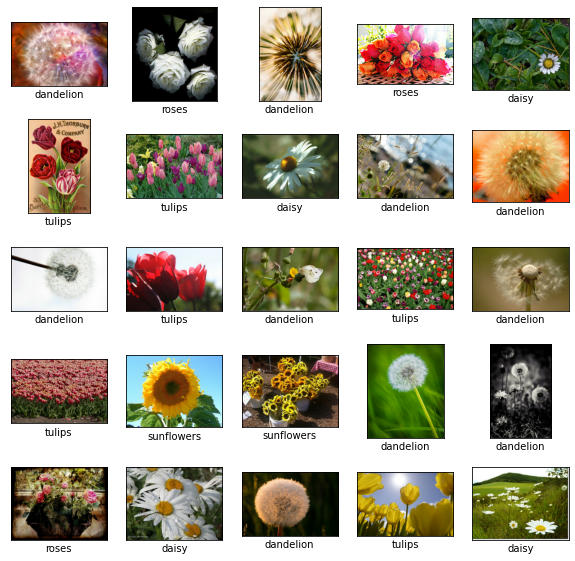

In [12]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()])
plt.show()

### Step 2: Customize the TensorFlow Model

Create a custom image classifier model based on the loaded data. The default model is EfficientNet-Lite0.


In [13]:
model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/5


/tmpfs/src/tf_docs_env/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


 1/91 [..............................] - ETA: 2:23 - loss: 1.8521 - accuracy: 0.1875

 3/91 [..............................] - ETA: 2s - loss: 1.7563 - accuracy: 0.2188  

 5/91 [>.............................] - ETA: 2s - loss: 1.7039 - accuracy: 0.2250

 7/91 [=>............................] - ETA: 2s - loss: 1.6070 - accuracy: 0.2991

 9/91 [=>............................] - ETA: 2s - loss: 1.5622 - accuracy: 0.3264

11/91 [==>...........................] - ETA: 2s - loss: 1.4898 - accuracy: 0.3693

13/91 [===>..........................] - ETA: 2s - loss: 1.4464 - accuracy: 0.4014

15/91 [===>..........................] - ETA: 2s - loss: 1.3908 - accuracy: 0.4333

17/91 [====>.........................] - ETA: 2s - loss: 1.3380 - accuracy: 0.4632

19/91 [=====>........................] - ETA: 2s - loss: 1.2945 - accuracy: 0.4984

21/91 [=====>........................] - ETA: 2s - loss: 1.2584 - accuracy: 0.5223

23/91 [======>.......................] - ETA: 2s - loss: 1.2239 - accuracy: 0.5462

25/91 [=======>......................] - ETA: 2s - loss: 1.1898 - accuracy: 0.5700

27/91 [=======>......................] - ETA: 2s - loss: 1.1641 - accuracy: 0.5891

29/91 [========>.....................] - ETA: 2s - loss: 1.1380 - accuracy: 0.6056

31/91 [=========>....................] - ETA: 2s - loss: 1.1210 - accuracy: 0.6159

33/91 [=========>....................] - ETA: 1s - loss: 1.1077 - accuracy: 0.6259

35/91 [==========>...................] - ETA: 1s - loss: 1.0887 - accuracy: 0.6366

37/91 [===========>..................] - ETA: 1s - loss: 1.0719 - accuracy: 0.6461

39/91 [===========>..................] - ETA: 1s - loss: 1.0545 - accuracy: 0.6571

41/91 [============>.................] - ETA: 1s - loss: 1.0402 - accuracy: 0.6654

43/91 [=============>................] - ETA: 1s - loss: 1.0227 - accuracy: 0.6751

45/91 [=============>................] - ETA: 1s - loss: 1.0107 - accuracy: 0.6819

47/91 [==============>...............] - ETA: 1s - loss: 1.0012 - accuracy: 0.6862

49/91 [===============>..............] - ETA: 1s - loss: 0.9894 - accuracy: 0.6939

51/91 [===============>..............] - ETA: 1s - loss: 0.9782 - accuracy: 0.7010

53/91 [================>.............] - ETA: 1s - loss: 0.9737 - accuracy: 0.7034

55/91 [=================>............] - ETA: 1s - loss: 0.9672 - accuracy: 0.7063

57/91 [=================>............] - ETA: 1s - loss: 0.9605 - accuracy: 0.7100

59/91 [==================>...........] - ETA: 1s - loss: 0.9549 - accuracy: 0.7135

61/91 [===================>..........] - ETA: 1s - loss: 0.9447 - accuracy: 0.7188

63/91 [===================>..........] - ETA: 0s - loss: 0.9382 - accuracy: 0.7212

65/91 [====================>.........] - ETA: 0s - loss: 0.9318 - accuracy: 0.7255

67/91 [=====================>........] - ETA: 0s - loss: 0.9238 - accuracy: 0.7309

69/91 [=====================>........] - ETA: 0s - loss: 0.9168 - accuracy: 0.7364

71/91 [======================>.......] - ETA: 0s - loss: 0.9140 - accuracy: 0.7372

73/91 [=======================>......] - ETA: 0s - loss: 0.9070 - accuracy: 0.7414

75/91 [=======================>......] - ETA: 0s - loss: 0.9030 - accuracy: 0.7442

77/91 [========================>.....] - ETA: 0s - loss: 0.8998 - accuracy: 0.7459

79/91 [=========================>....] - ETA: 0s - loss: 0.8957 - accuracy: 0.7484

81/91 [=========================>....] - ETA: 0s - loss: 0.8903 - accuracy: 0.7512

83/91 [==========================>...] - ETA: 0s - loss: 0.8855 - accuracy: 0.7545

85/91 [===========================>..] - ETA: 0s - loss: 0.8818 - accuracy: 0.7577

87/91 [===========================>..] - ETA: 0s - loss: 0.8793 - accuracy: 0.7586

89/91 [============================>.] - ETA: 0s - loss: 0.8730 - accuracy: 0.7630

91/91 [==============================] - ETA: 0s - loss: 0.8689 - accuracy: 0.7655

91/91 [==============================] - 6s 54ms/step - loss: 0.8689 - accuracy: 0.7655 - val_loss: 0.6941 - val_accuracy: 0.8835


Epoch 2/5
 1/91 [..............................] - ETA: 1s - loss: 0.7423 - accuracy: 0.8438

 4/91 [>.............................] - ETA: 1s - loss: 0.6765 - accuracy: 0.8750

 6/91 [>.............................] - ETA: 2s - loss: 0.6690 - accuracy: 0.8906

 8/91 [=>............................] - ETA: 2s - loss: 0.6692 - accuracy: 0.8867

10/91 [==>...........................] - ETA: 2s - loss: 0.6756 - accuracy: 0.8750

12/91 [==>...........................] - ETA: 2s - loss: 0.6680 - accuracy: 0.8750

14/91 [===>..........................] - ETA: 2s - loss: 0.6795 - accuracy: 0.8661

16/91 [====>.........................] - ETA: 2s - loss: 0.6705 - accuracy: 0.8711

18/91 [====>.........................] - ETA: 2s - loss: 0.6641 - accuracy: 0.8785

20/91 [=====>........................] - ETA: 2s - loss: 0.6644 - accuracy: 0.8813

22/91 [======>.......................] - ETA: 2s - loss: 0.6640 - accuracy: 0.8821

24/91 [======>.......................] - ETA: 2s - loss: 0.6643 - accuracy: 0.8815

26/91 [=======>......................] - ETA: 2s - loss: 0.6654 - accuracy: 0.8834

28/91 [========>.....................] - ETA: 2s - loss: 0.6644 - accuracy: 0.8850

30/91 [========>.....................] - ETA: 2s - loss: 0.6644 - accuracy: 0.8854

32/91 [=========>....................] - ETA: 2s - loss: 0.6681 - accuracy: 0.8818

34/91 [==========>...................] - ETA: 1s - loss: 0.6731 - accuracy: 0.8796

36/91 [==========>...................] - ETA: 1s - loss: 0.6741 - accuracy: 0.8793

38/91 [===========>..................] - ETA: 1s - loss: 0.6758 - accuracy: 0.8799

40/91 [============>.................] - ETA: 1s - loss: 0.6732 - accuracy: 0.8820

42/91 [============>.................] - ETA: 1s - loss: 0.6699 - accuracy: 0.8839

44/91 [=============>................] - ETA: 1s - loss: 0.6671 - accuracy: 0.8857

46/91 [==============>...............] - ETA: 1s - loss: 0.6630 - accuracy: 0.8886

48/91 [==============>...............] - ETA: 1s - loss: 0.6645 - accuracy: 0.8874

50/91 [===============>..............] - ETA: 1s - loss: 0.6640 - accuracy: 0.8869

52/91 [================>.............] - ETA: 1s - loss: 0.6604 - accuracy: 0.8894

54/91 [================>.............] - ETA: 1s - loss: 0.6651 - accuracy: 0.8854

56/91 [=================>............] - ETA: 1s - loss: 0.6641 - accuracy: 0.8878

58/91 [==================>...........] - ETA: 1s - loss: 0.6644 - accuracy: 0.8879

60/91 [==================>...........] - ETA: 1s - loss: 0.6659 - accuracy: 0.8870

62/91 [===================>..........] - ETA: 1s - loss: 0.6641 - accuracy: 0.8881

64/91 [====================>.........] - ETA: 0s - loss: 0.6636 - accuracy: 0.8877

66/91 [====================>.........] - ETA: 0s - loss: 0.6628 - accuracy: 0.8892

68/91 [=====================>........] - ETA: 0s - loss: 0.6615 - accuracy: 0.8902

70/91 [======================>.......] - ETA: 0s - loss: 0.6612 - accuracy: 0.8906

72/91 [======================>.......] - ETA: 0s - loss: 0.6637 - accuracy: 0.8893

74/91 [=======================>......] - ETA: 0s - loss: 0.6628 - accuracy: 0.8898

76/91 [========================>.....] - ETA: 0s - loss: 0.6622 - accuracy: 0.8906

78/91 [========================>.....] - ETA: 0s - loss: 0.6630 - accuracy: 0.8902

80/91 [=========================>....] - ETA: 0s - loss: 0.6615 - accuracy: 0.8910

82/91 [==========================>...] - ETA: 0s - loss: 0.6606 - accuracy: 0.8914

84/91 [==========================>...] - ETA: 0s - loss: 0.6611 - accuracy: 0.8925

86/91 [===========================>..] - ETA: 0s - loss: 0.6612 - accuracy: 0.8928

88/91 [============================>.] - ETA: 0s - loss: 0.6618 - accuracy: 0.8924

90/91 [============================>.] - ETA: 0s - loss: 0.6598 - accuracy: 0.8944

91/91 [==============================] - 5s 50ms/step - loss: 0.6596 - accuracy: 0.8949 - val_loss: 0.6668 - val_accuracy: 0.8807


Epoch 3/5
 1/91 [..............................] - ETA: 1s - loss: 0.5741 - accuracy: 0.9375

 4/91 [>.............................] - ETA: 1s - loss: 0.5944 - accuracy: 0.9375

 7/91 [=>............................] - ETA: 1s - loss: 0.6019 - accuracy: 0.9286

 9/91 [=>............................] - ETA: 1s - loss: 0.6009 - accuracy: 0.9201

11/91 [==>...........................] - ETA: 2s - loss: 0.6104 - accuracy: 0.9119

13/91 [===>..........................] - ETA: 2s - loss: 0.6039 - accuracy: 0.9183

15/91 [===>..........................] - ETA: 2s - loss: 0.6120 - accuracy: 0.9146

17/91 [====>.........................] - ETA: 2s - loss: 0.6056 - accuracy: 0.9210

19/91 [=====>........................] - ETA: 2s - loss: 0.5966 - accuracy: 0.9276

21/91 [=====>........................] - ETA: 2s - loss: 0.6007 - accuracy: 0.9256

23/91 [======>.......................] - ETA: 2s - loss: 0.6015 - accuracy: 0.9253

25/91 [=======>......................] - ETA: 1s - loss: 0.6077 - accuracy: 0.9212

27/91 [=======>......................] - ETA: 1s - loss: 0.6103 - accuracy: 0.9190

29/91 [========>.....................] - ETA: 1s - loss: 0.6105 - accuracy: 0.9203

31/91 [=========>....................] - ETA: 1s - loss: 0.6101 - accuracy: 0.9214

33/91 [=========>....................] - ETA: 1s - loss: 0.6140 - accuracy: 0.9195

35/91 [==========>...................] - ETA: 1s - loss: 0.6164 - accuracy: 0.9187

37/91 [===========>..................] - ETA: 1s - loss: 0.6198 - accuracy: 0.9139

39/91 [===========>..................] - ETA: 1s - loss: 0.6194 - accuracy: 0.9159

41/91 [============>.................] - ETA: 1s - loss: 0.6174 - accuracy: 0.9162

43/91 [=============>................] - ETA: 1s - loss: 0.6163 - accuracy: 0.9157

45/91 [=============>................] - ETA: 1s - loss: 0.6160 - accuracy: 0.9153

47/91 [==============>...............] - ETA: 1s - loss: 0.6154 - accuracy: 0.9156

49/91 [===============>..............] - ETA: 1s - loss: 0.6182 - accuracy: 0.9145

51/91 [===============>..............] - ETA: 1s - loss: 0.6183 - accuracy: 0.9154

53/91 [================>.............] - ETA: 1s - loss: 0.6173 - accuracy: 0.9175

55/91 [=================>............] - ETA: 1s - loss: 0.6195 - accuracy: 0.9148

57/91 [=================>............] - ETA: 1s - loss: 0.6200 - accuracy: 0.9145

59/91 [==================>...........] - ETA: 1s - loss: 0.6203 - accuracy: 0.9142

61/91 [===================>..........] - ETA: 1s - loss: 0.6211 - accuracy: 0.9134

63/91 [===================>..........] - ETA: 0s - loss: 0.6197 - accuracy: 0.9152

65/91 [====================>.........] - ETA: 0s - loss: 0.6198 - accuracy: 0.9144

67/91 [=====================>........] - ETA: 0s - loss: 0.6177 - accuracy: 0.9156

69/91 [=====================>........] - ETA: 0s - loss: 0.6173 - accuracy: 0.9158

71/91 [======================>.......] - ETA: 0s - loss: 0.6165 - accuracy: 0.9164

73/91 [=======================>......] - ETA: 0s - loss: 0.6176 - accuracy: 0.9157

75/91 [=======================>......] - ETA: 0s - loss: 0.6177 - accuracy: 0.9146

77/91 [========================>.....] - ETA: 0s - loss: 0.6187 - accuracy: 0.9144

79/91 [=========================>....] - ETA: 0s - loss: 0.6194 - accuracy: 0.9138

81/91 [=========================>....] - ETA: 0s - loss: 0.6194 - accuracy: 0.9140

83/91 [==========================>...] - ETA: 0s - loss: 0.6195 - accuracy: 0.9138

85/91 [===========================>..] - ETA: 0s - loss: 0.6191 - accuracy: 0.9147

87/91 [===========================>..] - ETA: 0s - loss: 0.6197 - accuracy: 0.9149

89/91 [============================>.] - ETA: 0s - loss: 0.6198 - accuracy: 0.9150

91/91 [==============================] - ETA: 0s - loss: 0.6188 - accuracy: 0.9159

91/91 [==============================] - 5s 50ms/step - loss: 0.6188 - accuracy: 0.9159 - val_loss: 0.6537 - val_accuracy: 0.8807


Epoch 4/5
 1/91 [..............................] - ETA: 1s - loss: 0.5641 - accuracy: 0.9375

 4/91 [>.............................] - ETA: 1s - loss: 0.5579 - accuracy: 0.9531

 7/91 [=>............................] - ETA: 1s - loss: 0.5854 - accuracy: 0.9286

10/91 [==>...........................] - ETA: 1s - loss: 0.6030 - accuracy: 0.9187

13/91 [===>..........................] - ETA: 1s - loss: 0.5993 - accuracy: 0.9231

16/91 [====>.........................] - ETA: 1s - loss: 0.6039 - accuracy: 0.9219

19/91 [=====>........................] - ETA: 1s - loss: 0.6004 - accuracy: 0.9260

21/91 [=====>........................] - ETA: 1s - loss: 0.6000 - accuracy: 0.9271

23/91 [======>.......................] - ETA: 1s - loss: 0.5981 - accuracy: 0.9280

25/91 [=======>......................] - ETA: 1s - loss: 0.6014 - accuracy: 0.9287

27/91 [=======>......................] - ETA: 1s - loss: 0.6077 - accuracy: 0.9248

29/91 [========>.....................] - ETA: 1s - loss: 0.6042 - accuracy: 0.9289

31/91 [=========>....................] - ETA: 1s - loss: 0.6061 - accuracy: 0.9264

33/91 [=========>....................] - ETA: 1s - loss: 0.6071 - accuracy: 0.9261

35/91 [==========>...................] - ETA: 1s - loss: 0.6112 - accuracy: 0.9223

37/91 [===========>..................] - ETA: 1s - loss: 0.6118 - accuracy: 0.9215

39/91 [===========>..................] - ETA: 1s - loss: 0.6107 - accuracy: 0.9215

41/91 [============>.................] - ETA: 1s - loss: 0.6106 - accuracy: 0.9215

43/91 [=============>................] - ETA: 1s - loss: 0.6079 - accuracy: 0.9230

45/91 [=============>................] - ETA: 1s - loss: 0.6054 - accuracy: 0.9243

47/91 [==============>...............] - ETA: 1s - loss: 0.6039 - accuracy: 0.9249

49/91 [===============>..............] - ETA: 1s - loss: 0.6051 - accuracy: 0.9235

51/91 [===============>..............] - ETA: 1s - loss: 0.6047 - accuracy: 0.9246

53/91 [================>.............] - ETA: 1s - loss: 0.6038 - accuracy: 0.9245

55/91 [=================>............] - ETA: 1s - loss: 0.6075 - accuracy: 0.9216

57/91 [=================>............] - ETA: 1s - loss: 0.6065 - accuracy: 0.9227

59/91 [==================>...........] - ETA: 1s - loss: 0.6069 - accuracy: 0.9232

61/91 [===================>..........] - ETA: 0s - loss: 0.6067 - accuracy: 0.9242

63/91 [===================>..........] - ETA: 0s - loss: 0.6056 - accuracy: 0.9251

65/91 [====================>.........] - ETA: 0s - loss: 0.6060 - accuracy: 0.9240

67/91 [=====================>........] - ETA: 0s - loss: 0.6050 - accuracy: 0.9254

69/91 [=====================>........] - ETA: 0s - loss: 0.6039 - accuracy: 0.9253

71/91 [======================>.......] - ETA: 0s - loss: 0.6032 - accuracy: 0.9247

72/91 [======================>.......] - ETA: 0s - loss: 0.6030 - accuracy: 0.9245

74/91 [=======================>......] - ETA: 0s - loss: 0.6040 - accuracy: 0.9227

76/91 [========================>.....] - ETA: 0s - loss: 0.6044 - accuracy: 0.9219

78/91 [========================>.....] - ETA: 0s - loss: 0.6043 - accuracy: 0.9223

80/91 [=========================>....] - ETA: 0s - loss: 0.6052 - accuracy: 0.9219

82/91 [==========================>...] - ETA: 0s - loss: 0.6051 - accuracy: 0.9215

84/91 [==========================>...] - ETA: 0s - loss: 0.6054 - accuracy: 0.9211

86/91 [===========================>..] - ETA: 0s - loss: 0.6041 - accuracy: 0.9226

88/91 [============================>.] - ETA: 0s - loss: 0.6048 - accuracy: 0.9219

90/91 [============================>.] - ETA: 0s - loss: 0.6054 - accuracy: 0.9208

91/91 [==============================] - 5s 52ms/step - loss: 0.6050 - accuracy: 0.9210 - val_loss: 0.6432 - val_accuracy: 0.8892


Epoch 5/5
 1/91 [..............................] - ETA: 1s - loss: 0.6033 - accuracy: 0.9375

 4/91 [>.............................] - ETA: 1s - loss: 0.5798 - accuracy: 0.9531

 7/91 [=>............................] - ETA: 1s - loss: 0.5856 - accuracy: 0.9375

10/91 [==>...........................] - ETA: 1s - loss: 0.5733 - accuracy: 0.9469

13/91 [===>..........................] - ETA: 1s - loss: 0.5789 - accuracy: 0.9399

16/91 [====>.........................] - ETA: 1s - loss: 0.5902 - accuracy: 0.9375

18/91 [====>.........................] - ETA: 1s - loss: 0.5864 - accuracy: 0.9392

21/91 [=====>........................] - ETA: 1s - loss: 0.5823 - accuracy: 0.9405

24/91 [======>.......................] - ETA: 1s - loss: 0.5800 - accuracy: 0.9401

27/91 [=======>......................] - ETA: 1s - loss: 0.5816 - accuracy: 0.9363

30/91 [========>.....................] - ETA: 1s - loss: 0.5861 - accuracy: 0.9385

33/91 [=========>....................] - ETA: 1s - loss: 0.5893 - accuracy: 0.9356

35/91 [==========>...................] - ETA: 1s - loss: 0.5940 - accuracy: 0.9312

37/91 [===========>..................] - ETA: 1s - loss: 0.5935 - accuracy: 0.9324

40/91 [============>.................] - ETA: 1s - loss: 0.5974 - accuracy: 0.9328

43/91 [=============>................] - ETA: 1s - loss: 0.5949 - accuracy: 0.9331

45/91 [=============>................] - ETA: 1s - loss: 0.5934 - accuracy: 0.9340

47/91 [==============>...............] - ETA: 1s - loss: 0.5933 - accuracy: 0.9342

49/91 [===============>..............] - ETA: 1s - loss: 0.5903 - accuracy: 0.9356

51/91 [===============>..............] - ETA: 0s - loss: 0.5915 - accuracy: 0.9350

53/91 [================>.............] - ETA: 0s - loss: 0.5917 - accuracy: 0.9351

55/91 [=================>............] - ETA: 0s - loss: 0.5912 - accuracy: 0.9352

57/91 [=================>............] - ETA: 0s - loss: 0.5933 - accuracy: 0.9342

59/91 [==================>...........] - ETA: 0s - loss: 0.5937 - accuracy: 0.9343

61/91 [===================>..........] - ETA: 0s - loss: 0.5937 - accuracy: 0.9344

63/91 [===================>..........] - ETA: 0s - loss: 0.5935 - accuracy: 0.9335

65/91 [====================>.........] - ETA: 0s - loss: 0.5928 - accuracy: 0.9346

67/91 [=====================>........] - ETA: 0s - loss: 0.5924 - accuracy: 0.9352

69/91 [=====================>........] - ETA: 0s - loss: 0.5921 - accuracy: 0.9352

71/91 [======================>.......] - ETA: 0s - loss: 0.5912 - accuracy: 0.9340

73/91 [=======================>......] - ETA: 0s - loss: 0.5912 - accuracy: 0.9336

75/91 [=======================>......] - ETA: 0s - loss: 0.5922 - accuracy: 0.9325

77/91 [========================>.....] - ETA: 0s - loss: 0.5917 - accuracy: 0.9330

79/91 [=========================>....] - ETA: 0s - loss: 0.5920 - accuracy: 0.9328

81/91 [=========================>....] - ETA: 0s - loss: 0.5916 - accuracy: 0.9336

83/91 [==========================>...] - ETA: 0s - loss: 0.5909 - accuracy: 0.9337

85/91 [===========================>..] - ETA: 0s - loss: 0.5906 - accuracy: 0.9342

87/91 [===========================>..] - ETA: 0s - loss: 0.5899 - accuracy: 0.9350

89/91 [============================>.] - ETA: 0s - loss: 0.5900 - accuracy: 0.9343

91/91 [==============================] - ETA: 0s - loss: 0.5898 - accuracy: 0.9348

91/91 [==============================] - 5s 52ms/step - loss: 0.5898 - accuracy: 0.9348 - val_loss: 0.6348 - val_accuracy: 0.8864


Have a look at the detailed model structure.

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_1 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________


### Step 3: Evaluate the Customized Model

Evaluate the result of the model, get the loss and accuracy of the model.

In [15]:
loss, accuracy = model.evaluate(test_data)

 1/12 [=>............................] - ETA: 12s - loss: 0.6546 - accuracy: 0.8750

 4/12 [=========>....................] - ETA: 0s - loss: 0.6471 - accuracy: 0.8906 

 6/12 [==============>...............] - ETA: 0s - loss: 0.6384 - accuracy: 0.8958

 8/12 [===================>..........] - ETA: 0s - loss: 0.6496 - accuracy: 0.8828

10/12 [========================>.....] - ETA: 0s - loss: 0.6395 - accuracy: 0.8906

12/12 [==============================] - 1s 27ms/step - loss: 0.6324 - accuracy: 0.8965


We could plot the predicted results in 100 test images. Predicted labels with red color are the wrong predicted results while others are correct.

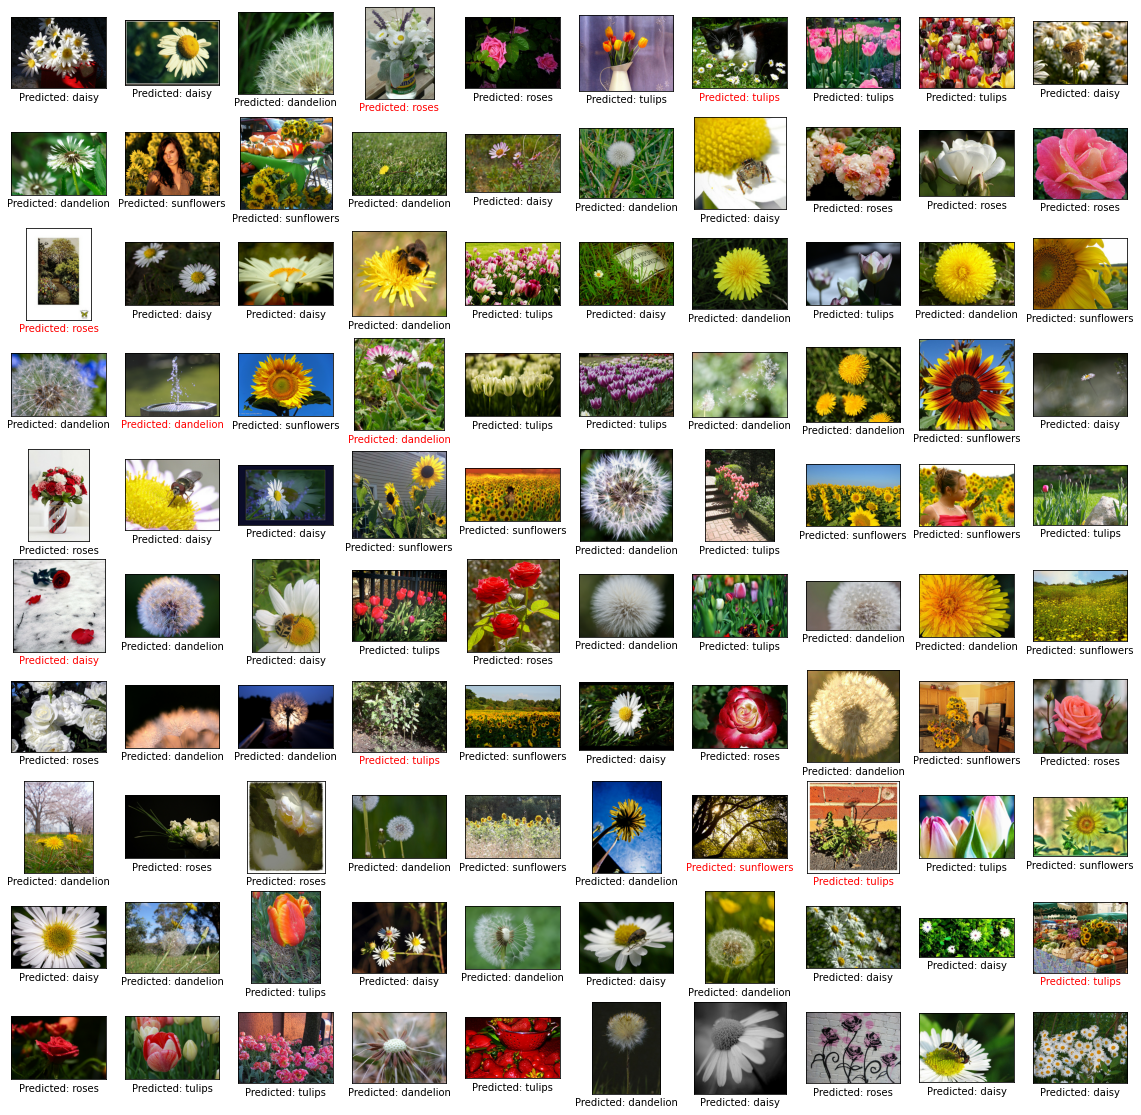

In [16]:
# A helper function that returns 'red'/'black' depending on if its two input
# parameter matches or not.
def get_label_color(val1, val2):
  if val1 == val2:
    return 'black'
  else:
    return 'red'

# Then plot 100 test images and their predicted labels.
# If a prediction result is different from the label provided label in "test"
# dataset, we will highlight it in red color.
plt.figure(figsize=(20, 20))
predicts = model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()

If the accuracy doesn't meet the app requirement, one could refer to [Advanced Usage](#scrollTo=zNDBP2qA54aK) to explore alternatives such as changing to a larger model, adjusting re-training parameters etc.

### Step 4: Export to TensorFlow Lite Model

Convert the trained model to TensorFlow Lite model format with [metadata](https://www.tensorflow.org/lite/convert/metadata) so that you can later use in an on-device ML application. The label file and the vocab file are embedded in metadata. The default TFLite filename is `model.tflite`.

In many on-device ML application, the model size is an important factor. Therefore, it is recommended that you apply quantize the model to make it smaller and potentially run faster.
The default post-training quantization technique is full integer quantization for the image classification task.

In [17]:
model.export(export_dir='.')

INFO:tensorflow:Assets written to: /tmp/tmp6tt5g8de/assets


INFO:tensorflow:Assets written to: /tmp/tmp6tt5g8de/assets


2021-11-02 11:35:40.254046: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2021-11-02 11:35:40.254099: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.


fully_quantize: 0, inference_type: 6, input_inference_type: 3, output_inference_type: 3


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpf601xty1/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpf601xty1/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model.tflite


See [example applications and guides of image classification](https://www.tensorflow.org/lite/models/image_classification/overview#example_applications_and_guides) for more details about how to integrate the TensorFlow Lite model into mobile apps.

This model can be integrated into an Android or an iOS app using the [ImageClassifier API](https://www.tensorflow.org/lite/inference_with_metadata/task_library/image_classifier) of the [TensorFlow Lite Task Library](https://www.tensorflow.org/lite/inference_with_metadata/task_library/overview).

The allowed export formats can be one or a list of the following:

*   `ExportFormat.TFLITE`
*   `ExportFormat.LABEL`
*   `ExportFormat.SAVED_MODEL`

By default, it just exports TensorFlow Lite model with metadata. You can also selectively export different files. For instance, exporting only the label file as follows:

In [18]:
model.export(export_dir='.', export_format=ExportFormat.LABEL)

INFO:tensorflow:Saving labels in ./labels.txt


INFO:tensorflow:Saving labels in ./labels.txt


You can also evaluate the tflite model with the `evaluate_tflite` method.

In [19]:
model.evaluate_tflite('model.tflite', test_data)

{'accuracy': 0.9019073569482289}

## Advanced Usage

The `create` function is the critical part of this library. It uses transfer learning with a pretrained model similar to the [tutorial](https://www.tensorflow.org/tutorials/images/transfer_learning).

The `create` function contains the following steps:

1.   Split the data into training, validation, testing data according to parameter `validation_ratio` and `test_ratio`. The default value of `validation_ratio` and `test_ratio` are `0.1` and `0.1`.
2.   Download a [Image Feature Vector](https://www.tensorflow.org/hub/common_signatures/images#image_feature_vector) as the base model from TensorFlow Hub. The default pre-trained model is  EfficientNet-Lite0.
3.   Add a classifier head with a Dropout Layer with `dropout_rate` between head layer and pre-trained model. The default `dropout_rate` is the default `dropout_rate` value from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub.
4.   Preprocess the raw input data. Currently, preprocessing steps including normalizing the value of each image pixel to model input scale and resizing it to model input size.   EfficientNet-Lite0 have the input scale `[0, 1]` and the input image size `[224, 224, 3]`.
5.   Feed the data into the classifier model. By default, the training parameters such as training epochs, batch size, learning rate, momentum are the default values from [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/master/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L55) by TensorFlow Hub. Only the classifier head is trained.


In this section, we describe several advanced topics, including switching to a different image classification model, changing the training hyperparameters etc.


## Customize Post-training quantization on the TensorFLow Lite model


[Post-training quantization](https://www.tensorflow.org/lite/performance/post_training_quantization) is a conversion technique that can reduce model size and inference latency, while also improving CPU and hardware accelerator inference speed, with a little degradation in model accuracy. Thus, it's widely used to optimize the model.


Model Maker library applies a default post-training quantization techique when exporting the model. If you want to customize post-training quantization, Model Maker supports multiple post-training quantization options using [QuantizationConfig](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/config/QuantizationConfig) as well. Let's take float16 quantization as an instance. First, define the quantization config.

In [20]:
config = QuantizationConfig.for_float16()

Then we export the TensorFlow Lite model with such configuration.

In [21]:
model.export(export_dir='.', tflite_filename='model_fp16.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: /tmp/tmpa528qeqj/assets


INFO:tensorflow:Assets written to: /tmp/tmpa528qeqj/assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


2021-11-02 11:43:43.724165: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:351] Ignored output_format.
2021-11-02 11:43:43.724219: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:354] Ignored drop_control_dependency.
INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in /tmp/tmpvlx_qa4j/labels.txt


INFO:tensorflow:Saving labels in /tmp/tmpvlx_qa4j/labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model_fp16.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: ./model_fp16.tflite


In Colab, you can download the model named `model_fp16.tflite` from the left sidebar, same as the uploading part mentioned above.

## Change the model


### Change to the model that's supported in this library.

This library supports  EfficientNet-Lite models, MobileNetV2, ResNet50 by now. [EfficientNet-Lite](https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet/lite) are a family of image classification models that could achieve state-of-art accuracy and suitable for Edge devices. The default model is EfficientNet-Lite0.

We could switch model to MobileNetV2 by just setting parameter `model_spec` to the MobileNetV2 model specification in `create` method.

In [22]:
model = image_classifier.create(train_data, model_spec=model_spec.get('mobilenet_v2'), validation_data=validation_data)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_2 (HubK (None, 1280)              2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
None
Epoch 1/5


/tmpfs/src/tf_docs_env/lib/python3.7/site-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


 1/91 [..............................] - ETA: 4:06 - loss: 1.7855 - accuracy: 0.3125

 4/91 [>.............................] - ETA: 2s - loss: 1.6216 - accuracy: 0.3516  

 6/91 [>.............................] - ETA: 2s - loss: 1.6336 - accuracy: 0.3438

 8/91 [=>............................] - ETA: 2s - loss: 1.5473 - accuracy: 0.4023

10/91 [==>...........................] - ETA: 2s - loss: 1.4745 - accuracy: 0.4406

12/91 [==>...........................] - ETA: 2s - loss: 1.4345 - accuracy: 0.4609

14/91 [===>..........................] - ETA: 2s - loss: 1.3961 - accuracy: 0.4754

16/91 [====>.........................] - ETA: 2s - loss: 1.3633 - accuracy: 0.4961

18/91 [====>.........................] - ETA: 2s - loss: 1.3126 - accuracy: 0.5278

20/91 [=====>........................] - ETA: 2s - loss: 1.2789 - accuracy: 0.5500

22/91 [======>.......................] - ETA: 2s - loss: 1.2430 - accuracy: 0.5682

24/91 [======>.......................] - ETA: 2s - loss: 1.2175 - accuracy: 0.5833

26/91 [=======>......................] - ETA: 2s - loss: 1.2006 - accuracy: 0.5962

28/91 [========>.....................] - ETA: 2s - loss: 1.1735 - accuracy: 0.6116

30/91 [========>.....................] - ETA: 2s - loss: 1.1449 - accuracy: 0.6292

32/91 [=========>....................] - ETA: 1s - loss: 1.1248 - accuracy: 0.6396

34/91 [==========>...................] - ETA: 1s - loss: 1.1053 - accuracy: 0.6526

36/91 [==========>...................] - ETA: 1s - loss: 1.0947 - accuracy: 0.6606

38/91 [===========>..................] - ETA: 1s - loss: 1.0808 - accuracy: 0.6711

40/91 [============>.................] - ETA: 1s - loss: 1.0696 - accuracy: 0.6781

42/91 [============>.................] - ETA: 1s - loss: 1.0592 - accuracy: 0.6830

44/91 [=============>................] - ETA: 1s - loss: 1.0454 - accuracy: 0.6903

46/91 [==============>...............] - ETA: 1s - loss: 1.0318 - accuracy: 0.6990

48/91 [==============>...............] - ETA: 1s - loss: 1.0308 - accuracy: 0.7005

50/91 [===============>..............] - ETA: 1s - loss: 1.0169 - accuracy: 0.7075

52/91 [================>.............] - ETA: 1s - loss: 1.0097 - accuracy: 0.7103

54/91 [================>.............] - ETA: 1s - loss: 1.0045 - accuracy: 0.7118

56/91 [=================>............] - ETA: 1s - loss: 0.9981 - accuracy: 0.7148

58/91 [==================>...........] - ETA: 1s - loss: 0.9927 - accuracy: 0.7193

60/91 [==================>...........] - ETA: 1s - loss: 0.9924 - accuracy: 0.7193

62/91 [===================>..........] - ETA: 0s - loss: 0.9856 - accuracy: 0.7238

64/91 [====================>.........] - ETA: 0s - loss: 0.9779 - accuracy: 0.7275

66/91 [====================>.........] - ETA: 0s - loss: 0.9675 - accuracy: 0.7334

68/91 [=====================>........] - ETA: 0s - loss: 0.9632 - accuracy: 0.7353

70/91 [======================>.......] - ETA: 0s - loss: 0.9562 - accuracy: 0.7397

72/91 [======================>.......] - ETA: 0s - loss: 0.9525 - accuracy: 0.7413

74/91 [=======================>......] - ETA: 0s - loss: 0.9484 - accuracy: 0.7437

76/91 [========================>.....] - ETA: 0s - loss: 0.9448 - accuracy: 0.7463

78/91 [========================>.....] - ETA: 0s - loss: 0.9402 - accuracy: 0.7496

80/91 [=========================>....] - ETA: 0s - loss: 0.9359 - accuracy: 0.7512

82/91 [==========================>...] - ETA: 0s - loss: 0.9334 - accuracy: 0.7534

84/91 [==========================>...] - ETA: 0s - loss: 0.9315 - accuracy: 0.7545

86/91 [===========================>..] - ETA: 0s - loss: 0.9282 - accuracy: 0.7562

88/91 [============================>.] - ETA: 0s - loss: 0.9244 - accuracy: 0.7592

90/91 [============================>.] - ETA: 0s - loss: 0.9189 - accuracy: 0.7618

91/91 [==============================] - 8s 53ms/step - loss: 0.9163 - accuracy: 0.7634 - val_loss: 0.7789 - val_accuracy: 0.8267


Epoch 2/5
 1/91 [..............................] - ETA: 1s - loss: 0.7900 - accuracy: 0.8125

 4/91 [>.............................] - ETA: 1s - loss: 0.6894 - accuracy: 0.8672

 6/91 [>.............................] - ETA: 2s - loss: 0.7133 - accuracy: 0.8594

 8/91 [=>............................] - ETA: 2s - loss: 0.7073 - accuracy: 0.8672

10/91 [==>...........................] - ETA: 2s - loss: 0.7107 - accuracy: 0.8625

12/91 [==>...........................] - ETA: 2s - loss: 0.7067 - accuracy: 0.8672

14/91 [===>..........................] - ETA: 2s - loss: 0.7320 - accuracy: 0.8549

16/91 [====>.........................] - ETA: 2s - loss: 0.7314 - accuracy: 0.8555

18/91 [====>.........................] - ETA: 2s - loss: 0.7149 - accuracy: 0.8663

20/91 [=====>........................] - ETA: 2s - loss: 0.7221 - accuracy: 0.8641

22/91 [======>.......................] - ETA: 2s - loss: 0.7172 - accuracy: 0.8665

24/91 [======>.......................] - ETA: 2s - loss: 0.7185 - accuracy: 0.8646

26/91 [=======>......................] - ETA: 2s - loss: 0.7205 - accuracy: 0.8630

28/91 [========>.....................] - ETA: 2s - loss: 0.7198 - accuracy: 0.8605

30/91 [========>.....................] - ETA: 2s - loss: 0.7132 - accuracy: 0.8615

32/91 [=========>....................] - ETA: 2s - loss: 0.7081 - accuracy: 0.8623

34/91 [==========>...................] - ETA: 1s - loss: 0.7051 - accuracy: 0.8649

36/91 [==========>...................] - ETA: 1s - loss: 0.7052 - accuracy: 0.8655

38/91 [===========>..................] - ETA: 1s - loss: 0.7002 - accuracy: 0.8692

40/91 [============>.................] - ETA: 1s - loss: 0.6971 - accuracy: 0.8719

42/91 [============>.................] - ETA: 1s - loss: 0.6948 - accuracy: 0.8735

44/91 [=============>................] - ETA: 1s - loss: 0.6914 - accuracy: 0.8736

46/91 [==============>...............] - ETA: 1s - loss: 0.6865 - accuracy: 0.8757

48/91 [==============>...............] - ETA: 1s - loss: 0.6877 - accuracy: 0.8763

50/91 [===============>..............] - ETA: 1s - loss: 0.6888 - accuracy: 0.8763

52/91 [================>.............] - ETA: 1s - loss: 0.6855 - accuracy: 0.8774

54/91 [================>.............] - ETA: 1s - loss: 0.6852 - accuracy: 0.8773

56/91 [=================>............] - ETA: 1s - loss: 0.6858 - accuracy: 0.8767

58/91 [==================>...........] - ETA: 1s - loss: 0.6877 - accuracy: 0.8755

60/91 [==================>...........] - ETA: 1s - loss: 0.6927 - accuracy: 0.8734

62/91 [===================>..........] - ETA: 1s - loss: 0.6921 - accuracy: 0.8735

64/91 [====================>.........] - ETA: 0s - loss: 0.6928 - accuracy: 0.8726

66/91 [====================>.........] - ETA: 0s - loss: 0.6901 - accuracy: 0.8745

68/91 [=====================>........] - ETA: 0s - loss: 0.6887 - accuracy: 0.8764

70/91 [======================>.......] - ETA: 0s - loss: 0.6872 - accuracy: 0.8772

72/91 [======================>.......] - ETA: 0s - loss: 0.6866 - accuracy: 0.8789

74/91 [=======================>......] - ETA: 0s - loss: 0.6880 - accuracy: 0.8788

76/91 [========================>.....] - ETA: 0s - loss: 0.6870 - accuracy: 0.8795

78/91 [========================>.....] - ETA: 0s - loss: 0.6877 - accuracy: 0.8794

80/91 [=========================>....] - ETA: 0s - loss: 0.6882 - accuracy: 0.8793

82/91 [==========================>...] - ETA: 0s - loss: 0.6871 - accuracy: 0.8796

84/91 [==========================>...] - ETA: 0s - loss: 0.6901 - accuracy: 0.8787

86/91 [===========================>..] - ETA: 0s - loss: 0.6893 - accuracy: 0.8786

88/91 [============================>.] - ETA: 0s - loss: 0.6872 - accuracy: 0.8800

90/91 [============================>.] - ETA: 0s - loss: 0.6853 - accuracy: 0.8809

91/91 [==============================] - 4s 50ms/step - loss: 0.6836 - accuracy: 0.8822 - val_loss: 0.7223 - val_accuracy: 0.8551


Epoch 3/5
 1/91 [..............................] - ETA: 1s - loss: 0.6618 - accuracy: 0.9375

 4/91 [>.............................] - ETA: 1s - loss: 0.6035 - accuracy: 0.9453

 7/91 [=>............................] - ETA: 1s - loss: 0.6517 - accuracy: 0.9241

 9/91 [=>............................] - ETA: 1s - loss: 0.6601 - accuracy: 0.9062

11/91 [==>...........................] - ETA: 2s - loss: 0.6553 - accuracy: 0.9006

13/91 [===>..........................] - ETA: 2s - loss: 0.6502 - accuracy: 0.9014

15/91 [===>..........................] - ETA: 2s - loss: 0.6717 - accuracy: 0.8938

17/91 [====>.........................] - ETA: 2s - loss: 0.6664 - accuracy: 0.8952

19/91 [=====>........................] - ETA: 2s - loss: 0.6548 - accuracy: 0.9046

21/91 [=====>........................] - ETA: 2s - loss: 0.6625 - accuracy: 0.9003

23/91 [======>.......................] - ETA: 2s - loss: 0.6647 - accuracy: 0.8967

25/91 [=======>......................] - ETA: 1s - loss: 0.6637 - accuracy: 0.8975

27/91 [=======>......................] - ETA: 1s - loss: 0.6712 - accuracy: 0.8912

29/91 [========>.....................] - ETA: 1s - loss: 0.6701 - accuracy: 0.8901

31/91 [=========>....................] - ETA: 1s - loss: 0.6650 - accuracy: 0.8911

33/91 [=========>....................] - ETA: 1s - loss: 0.6576 - accuracy: 0.8949

35/91 [==========>...................] - ETA: 1s - loss: 0.6540 - accuracy: 0.8982

37/91 [===========>..................] - ETA: 1s - loss: 0.6578 - accuracy: 0.8986

39/91 [===========>..................] - ETA: 1s - loss: 0.6551 - accuracy: 0.9006

41/91 [============>.................] - ETA: 1s - loss: 0.6549 - accuracy: 0.9002

43/91 [=============>................] - ETA: 1s - loss: 0.6549 - accuracy: 0.9012

45/91 [=============>................] - ETA: 1s - loss: 0.6517 - accuracy: 0.9035

47/91 [==============>...............] - ETA: 1s - loss: 0.6488 - accuracy: 0.9043

49/91 [===============>..............] - ETA: 1s - loss: 0.6490 - accuracy: 0.9050

51/91 [===============>..............] - ETA: 1s - loss: 0.6485 - accuracy: 0.9062

53/91 [================>.............] - ETA: 1s - loss: 0.6445 - accuracy: 0.9086

55/91 [=================>............] - ETA: 1s - loss: 0.6471 - accuracy: 0.9051

57/91 [=================>............] - ETA: 1s - loss: 0.6463 - accuracy: 0.9062

59/91 [==================>...........] - ETA: 1s - loss: 0.6473 - accuracy: 0.9057

61/91 [===================>..........] - ETA: 0s - loss: 0.6511 - accuracy: 0.9042

63/91 [===================>..........] - ETA: 0s - loss: 0.6504 - accuracy: 0.9043

65/91 [====================>.........] - ETA: 0s - loss: 0.6513 - accuracy: 0.9034

67/91 [=====================>........] - ETA: 0s - loss: 0.6505 - accuracy: 0.9035

69/91 [=====================>........] - ETA: 0s - loss: 0.6508 - accuracy: 0.9031

71/91 [======================>.......] - ETA: 0s - loss: 0.6495 - accuracy: 0.9036

73/91 [=======================>......] - ETA: 0s - loss: 0.6508 - accuracy: 0.9033

75/91 [=======================>......] - ETA: 0s - loss: 0.6507 - accuracy: 0.9029

77/91 [========================>.....] - ETA: 0s - loss: 0.6506 - accuracy: 0.9030

79/91 [=========================>....] - ETA: 0s - loss: 0.6512 - accuracy: 0.9023

81/91 [=========================>....] - ETA: 0s - loss: 0.6506 - accuracy: 0.9028

83/91 [==========================>...] - ETA: 0s - loss: 0.6521 - accuracy: 0.9025

85/91 [===========================>..] - ETA: 0s - loss: 0.6531 - accuracy: 0.9026

87/91 [===========================>..] - ETA: 0s - loss: 0.6516 - accuracy: 0.9041

89/91 [============================>.] - ETA: 0s - loss: 0.6514 - accuracy: 0.9045

91/91 [==============================] - ETA: 0s - loss: 0.6506 - accuracy: 0.9045

91/91 [==============================] - 4s 50ms/step - loss: 0.6506 - accuracy: 0.9045 - val_loss: 0.7086 - val_accuracy: 0.8580


Epoch 4/5
 1/91 [..............................] - ETA: 1s - loss: 0.5973 - accuracy: 0.9062

 4/91 [>.............................] - ETA: 1s - loss: 0.5674 - accuracy: 0.9453

 7/91 [=>............................] - ETA: 1s - loss: 0.5819 - accuracy: 0.9330

10/91 [==>...........................] - ETA: 1s - loss: 0.5894 - accuracy: 0.9344

13/91 [===>..........................] - ETA: 1s - loss: 0.5894 - accuracy: 0.9375

16/91 [====>.........................] - ETA: 1s - loss: 0.6078 - accuracy: 0.9277

18/91 [====>.........................] - ETA: 1s - loss: 0.6090 - accuracy: 0.9306

20/91 [=====>........................] - ETA: 1s - loss: 0.6067 - accuracy: 0.9297

22/91 [======>.......................] - ETA: 1s - loss: 0.6141 - accuracy: 0.9261

24/91 [======>.......................] - ETA: 1s - loss: 0.6178 - accuracy: 0.9245

26/91 [=======>......................] - ETA: 1s - loss: 0.6190 - accuracy: 0.9219

28/91 [========>.....................] - ETA: 1s - loss: 0.6259 - accuracy: 0.9174

30/91 [========>.....................] - ETA: 1s - loss: 0.6273 - accuracy: 0.9167

32/91 [=========>....................] - ETA: 1s - loss: 0.6248 - accuracy: 0.9170

34/91 [==========>...................] - ETA: 1s - loss: 0.6244 - accuracy: 0.9164

36/91 [==========>...................] - ETA: 1s - loss: 0.6234 - accuracy: 0.9184

38/91 [===========>..................] - ETA: 1s - loss: 0.6259 - accuracy: 0.9169

40/91 [============>.................] - ETA: 1s - loss: 0.6251 - accuracy: 0.9180

42/91 [============>.................] - ETA: 1s - loss: 0.6214 - accuracy: 0.9211

44/91 [=============>................] - ETA: 1s - loss: 0.6226 - accuracy: 0.9205

46/91 [==============>...............] - ETA: 1s - loss: 0.6200 - accuracy: 0.9212

48/91 [==============>...............] - ETA: 1s - loss: 0.6185 - accuracy: 0.9206

50/91 [===============>..............] - ETA: 1s - loss: 0.6179 - accuracy: 0.9200

52/91 [================>.............] - ETA: 1s - loss: 0.6164 - accuracy: 0.9213

54/91 [================>.............] - ETA: 1s - loss: 0.6140 - accuracy: 0.9236

56/91 [=================>............] - ETA: 1s - loss: 0.6159 - accuracy: 0.9219

58/91 [==================>...........] - ETA: 0s - loss: 0.6170 - accuracy: 0.9224

60/91 [==================>...........] - ETA: 0s - loss: 0.6189 - accuracy: 0.9208

62/91 [===================>..........] - ETA: 0s - loss: 0.6198 - accuracy: 0.9209

64/91 [====================>.........] - ETA: 0s - loss: 0.6208 - accuracy: 0.9199

66/91 [====================>.........] - ETA: 0s - loss: 0.6208 - accuracy: 0.9200

68/91 [=====================>........] - ETA: 0s - loss: 0.6200 - accuracy: 0.9210

70/91 [======================>.......] - ETA: 0s - loss: 0.6194 - accuracy: 0.9210

72/91 [======================>.......] - ETA: 0s - loss: 0.6190 - accuracy: 0.9219

74/91 [=======================>......] - ETA: 0s - loss: 0.6209 - accuracy: 0.9219

76/91 [========================>.....] - ETA: 0s - loss: 0.6220 - accuracy: 0.9211

78/91 [========================>.....] - ETA: 0s - loss: 0.6210 - accuracy: 0.9223

80/91 [=========================>....] - ETA: 0s - loss: 0.6212 - accuracy: 0.9227

82/91 [==========================>...] - ETA: 0s - loss: 0.6213 - accuracy: 0.9234

84/91 [==========================>...] - ETA: 0s - loss: 0.6218 - accuracy: 0.9230

86/91 [===========================>..] - ETA: 0s - loss: 0.6219 - accuracy: 0.9222

88/91 [============================>.] - ETA: 0s - loss: 0.6217 - accuracy: 0.9226

90/91 [============================>.] - ETA: 0s - loss: 0.6229 - accuracy: 0.9222

91/91 [==============================] - 5s 50ms/step - loss: 0.6218 - accuracy: 0.9227 - val_loss: 0.7049 - val_accuracy: 0.8636


Epoch 5/5
 1/91 [..............................] - ETA: 2s - loss: 0.5727 - accuracy: 0.9688

 4/91 [>.............................] - ETA: 1s - loss: 0.5697 - accuracy: 0.9453

 7/91 [=>............................] - ETA: 1s - loss: 0.5746 - accuracy: 0.9375

10/91 [==>...........................] - ETA: 1s - loss: 0.5827 - accuracy: 0.9406

13/91 [===>..........................] - ETA: 1s - loss: 0.6010 - accuracy: 0.9327

16/91 [====>.........................] - ETA: 1s - loss: 0.6069 - accuracy: 0.9297

19/91 [=====>........................] - ETA: 1s - loss: 0.6079 - accuracy: 0.9309

22/91 [======>.......................] - ETA: 1s - loss: 0.6071 - accuracy: 0.9318

25/91 [=======>......................] - ETA: 1s - loss: 0.6193 - accuracy: 0.9275

28/91 [========>.....................] - ETA: 1s - loss: 0.6208 - accuracy: 0.9252

31/91 [=========>....................] - ETA: 1s - loss: 0.6223 - accuracy: 0.9234

34/91 [==========>...................] - ETA: 1s - loss: 0.6163 - accuracy: 0.9256

37/91 [===========>..................] - ETA: 1s - loss: 0.6173 - accuracy: 0.9257

39/91 [===========>..................] - ETA: 1s - loss: 0.6179 - accuracy: 0.9247

41/91 [============>.................] - ETA: 1s - loss: 0.6163 - accuracy: 0.9261

43/91 [=============>................] - ETA: 1s - loss: 0.6134 - accuracy: 0.9273

45/91 [=============>................] - ETA: 1s - loss: 0.6138 - accuracy: 0.9278

47/91 [==============>...............] - ETA: 1s - loss: 0.6106 - accuracy: 0.9295

49/91 [===============>..............] - ETA: 1s - loss: 0.6078 - accuracy: 0.9311

51/91 [===============>..............] - ETA: 0s - loss: 0.6079 - accuracy: 0.9314

53/91 [================>.............] - ETA: 0s - loss: 0.6055 - accuracy: 0.9328

55/91 [=================>............] - ETA: 0s - loss: 0.6043 - accuracy: 0.9330

57/91 [=================>............] - ETA: 0s - loss: 0.6042 - accuracy: 0.9337

59/91 [==================>...........] - ETA: 0s - loss: 0.6050 - accuracy: 0.9322

61/91 [===================>..........] - ETA: 0s - loss: 0.6065 - accuracy: 0.9319

63/91 [===================>..........] - ETA: 0s - loss: 0.6080 - accuracy: 0.9311

65/91 [====================>.........] - ETA: 0s - loss: 0.6081 - accuracy: 0.9312

67/91 [=====================>........] - ETA: 0s - loss: 0.6070 - accuracy: 0.9314

69/91 [=====================>........] - ETA: 0s - loss: 0.6063 - accuracy: 0.9316

71/91 [======================>.......] - ETA: 0s - loss: 0.6063 - accuracy: 0.9313

73/91 [=======================>......] - ETA: 0s - loss: 0.6065 - accuracy: 0.9302

75/91 [=======================>......] - ETA: 0s - loss: 0.6071 - accuracy: 0.9300

77/91 [========================>.....] - ETA: 0s - loss: 0.6062 - accuracy: 0.9298

79/91 [=========================>....] - ETA: 0s - loss: 0.6066 - accuracy: 0.9292

81/91 [=========================>....] - ETA: 0s - loss: 0.6076 - accuracy: 0.9286

83/91 [==========================>...] - ETA: 0s - loss: 0.6066 - accuracy: 0.9288

85/91 [===========================>..] - ETA: 0s - loss: 0.6084 - accuracy: 0.9290

87/91 [===========================>..] - ETA: 0s - loss: 0.6095 - accuracy: 0.9282

89/91 [============================>.] - ETA: 0s - loss: 0.6090 - accuracy: 0.9284

91/91 [==============================] - ETA: 0s - loss: 0.6092 - accuracy: 0.9279

91/91 [==============================] - 5s 52ms/step - loss: 0.6092 - accuracy: 0.9279 - val_loss: 0.7181 - val_accuracy: 0.8580


Evaluate the newly retrained MobileNetV2 model to see the accuracy and loss in testing data.

In [23]:
loss, accuracy = model.evaluate(test_data)

 1/12 [=>............................] - ETA: 12s - loss: 0.8123 - accuracy: 0.8125

 3/12 [======>.......................] - ETA: 0s - loss: 0.7419 - accuracy: 0.8438 

 5/12 [===========>..................] - ETA: 0s - loss: 0.7200 - accuracy: 0.8625

 7/12 [================>.............] - ETA: 0s - loss: 0.7182 - accuracy: 0.8661

 9/12 [=====================>........] - ETA: 0s - loss: 0.7057 - accuracy: 0.8681

11/12 [==========================>...] - ETA: 0s - loss: 0.6941 - accuracy: 0.8722

12/12 [==============================] - ETA: 0s - loss: 0.6866 - accuracy: 0.8747

12/12 [==============================] - 2s 35ms/step - loss: 0.6866 - accuracy: 0.8747


### Change to the model in TensorFlow Hub

Moreover, we could also switch to other new models that inputs an image and outputs a feature vector with TensorFlow Hub format.

As [Inception V3](https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1) model as an example, we could define `inception_v3_spec` which is an object of [image_classifier.ModelSpec](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker/image_classifier/ModelSpec) and contains the specification of the Inception V3 model.

We need to specify the model name `name`, the url of the TensorFlow Hub model `uri`. Meanwhile, the default value of `input_image_shape` is `[224, 224]`. We need to change it to `[299, 299]` for Inception V3 model.

In [24]:
inception_v3_spec = image_classifier.ModelSpec(
    uri='https://tfhub.dev/google/imagenet/inception_v3/feature_vector/1')
inception_v3_spec.input_image_shape = [299, 299]

Then, by setting parameter `model_spec` to `inception_v3_spec` in `create` method, we could retrain the Inception V3 model.

The remaining steps are exactly same and we could get a customized InceptionV3 TensorFlow Lite model in the end.

### Change your own custom model

If we'd like to use the custom model that's not in TensorFlow Hub, we should create and export [ModelSpec](https://www.tensorflow.org/hub/api_docs/python/hub/ModuleSpec) in TensorFlow Hub.

Then start to define `ModelSpec` object like the process above.

## Change the training hyperparameters
We could also change the training hyperparameters like `epochs`, `dropout_rate` and `batch_size` that could affect the model accuracy. The model parameters you can adjust are:


*   `epochs`: more epochs could achieve better accuracy until it converges but training for too many epochs may lead to overfitting.
*   `dropout_rate`: The rate for dropout, avoid overfitting. None by default.
*   `batch_size`: number of samples to use in one training step.  None by default.
*   `validation_data`: Validation data. If None, skips validation process. None by default.
*   `train_whole_model`: If true, the Hub module is trained together with the classification layer on top. Otherwise, only train the top classification layer. None by default.
*   `learning_rate`: Base learning rate. None by default.
*   `momentum`: a Python float forwarded to the optimizer. Only used when
      `use_hub_library` is True. None by default.
*   `shuffle`: Boolean, whether the data should be shuffled. False by default.
*   `use_augmentation`: Boolean, use data augmentation for preprocessing. False by default.
*   `use_hub_library`: Boolean, use `make_image_classifier_lib` from tensorflow hub to retrain the model. This training pipeline could achieve better performance for complicated dataset with many categories. True by default. 
*   `warmup_steps`: Number of warmup steps for warmup schedule on learning rate. If None, the default warmup_steps is used which is the total training steps in two epochs. Only used when `use_hub_library` is False. None by default.
*   `model_dir`: Optional, the location of the model checkpoint files. Only used when `use_hub_library` is False. None by default.

Parameters which are None by default like `epochs` will get the concrete default parameters in [make_image_classifier_lib](https://github.com/tensorflow/hub/blob/02ab9b7d3455e99e97abecf43c5d598a5528e20c/tensorflow_hub/tools/make_image_classifier/make_image_classifier_lib.py#L54) from TensorFlow Hub library or  [train_image_classifier_lib](https://github.com/tensorflow/examples/blob/f0260433d133fd3cea4a920d1e53ecda07163aee/tensorflow_examples/lite/model_maker/core/task/train_image_classifier_lib.py#L61).

For example, we could train with more epochs.


In [25]:
model = image_classifier.create(train_data, validation_data=validation_data, epochs=10)

INFO:tensorflow:Retraining the models...


INFO:tensorflow:Retraining the models...


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hub_keras_layer_v1v2_3 (HubK (None, 1280)              3413024   
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 6405      
Total params: 3,419,429
Trainable params: 6,405
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/10


 1/91 [..............................] - ETA: 2:25 - loss: 1.7557 - accuracy: 0.1250

 3/91 [..............................] - ETA: 3s - loss: 1.7600 - accuracy: 0.1458  

 5/91 [>.............................] - ETA: 3s - loss: 1.6778 - accuracy: 0.2000

 7/91 [=>............................] - ETA: 3s - loss: 1.6144 - accuracy: 0.2723

 9/91 [=>............................] - ETA: 2s - loss: 1.5730 - accuracy: 0.3194

11/91 [==>...........................] - ETA: 2s - loss: 1.5002 - accuracy: 0.3636

13/91 [===>..........................] - ETA: 2s - loss: 1.4765 - accuracy: 0.3894

15/91 [===>..........................] - ETA: 2s - loss: 1.4251 - accuracy: 0.4187

17/91 [====>.........................] - ETA: 2s - loss: 1.3798 - accuracy: 0.4485

19/91 [=====>........................] - ETA: 2s - loss: 1.3323 - accuracy: 0.4786

21/91 [=====>........................] - ETA: 2s - loss: 1.2925 - accuracy: 0.5074

23/91 [======>.......................] - ETA: 2s - loss: 1.2609 - accuracy: 0.5285

25/91 [=======>......................] - ETA: 2s - loss: 1.2288 - accuracy: 0.5487

27/91 [=======>......................] - ETA: 2s - loss: 1.1944 - accuracy: 0.5694

29/91 [========>.....................] - ETA: 2s - loss: 1.1672 - accuracy: 0.5841

31/91 [=========>....................] - ETA: 2s - loss: 1.1460 - accuracy: 0.5938

33/91 [=========>....................] - ETA: 2s - loss: 1.1323 - accuracy: 0.6023

35/91 [==========>...................] - ETA: 1s - loss: 1.1167 - accuracy: 0.6116

37/91 [===========>..................] - ETA: 1s - loss: 1.0966 - accuracy: 0.6242

39/91 [===========>..................] - ETA: 1s - loss: 1.0747 - accuracy: 0.6378

41/91 [============>.................] - ETA: 1s - loss: 1.0577 - accuracy: 0.6486

43/91 [=============>................] - ETA: 1s - loss: 1.0389 - accuracy: 0.6613

45/91 [=============>................] - ETA: 1s - loss: 1.0251 - accuracy: 0.6681

47/91 [==============>...............] - ETA: 1s - loss: 1.0150 - accuracy: 0.6742

49/91 [===============>..............] - ETA: 1s - loss: 1.0045 - accuracy: 0.6818

51/91 [===============>..............] - ETA: 1s - loss: 0.9935 - accuracy: 0.6881

53/91 [================>.............] - ETA: 1s - loss: 0.9897 - accuracy: 0.6893

55/91 [=================>............] - ETA: 1s - loss: 0.9807 - accuracy: 0.6960

57/91 [=================>............] - ETA: 1s - loss: 0.9718 - accuracy: 0.7012

59/91 [==================>...........] - ETA: 1s - loss: 0.9684 - accuracy: 0.7055

61/91 [===================>..........] - ETA: 1s - loss: 0.9588 - accuracy: 0.7111

63/91 [===================>..........] - ETA: 0s - loss: 0.9510 - accuracy: 0.7153

65/91 [====================>.........] - ETA: 0s - loss: 0.9440 - accuracy: 0.7202

67/91 [=====================>........] - ETA: 0s - loss: 0.9366 - accuracy: 0.7243

69/91 [=====================>........] - ETA: 0s - loss: 0.9288 - accuracy: 0.7301

71/91 [======================>.......] - ETA: 0s - loss: 0.9242 - accuracy: 0.7337

73/91 [=======================>......] - ETA: 0s - loss: 0.9175 - accuracy: 0.7376

75/91 [=======================>......] - ETA: 0s - loss: 0.9122 - accuracy: 0.7421

77/91 [========================>.....] - ETA: 0s - loss: 0.9075 - accuracy: 0.7459

79/91 [=========================>....] - ETA: 0s - loss: 0.9013 - accuracy: 0.7496

81/91 [=========================>....] - ETA: 0s - loss: 0.8963 - accuracy: 0.7515

83/91 [==========================>...] - ETA: 0s - loss: 0.8917 - accuracy: 0.7541

85/91 [===========================>..] - ETA: 0s - loss: 0.8874 - accuracy: 0.7559

87/91 [===========================>..] - ETA: 0s - loss: 0.8841 - accuracy: 0.7572

89/91 [============================>.] - ETA: 0s - loss: 0.8782 - accuracy: 0.7612

91/91 [==============================] - ETA: 0s - loss: 0.8735 - accuracy: 0.7644

91/91 [==============================] - 6s 53ms/step - loss: 0.8735 - accuracy: 0.7644 - val_loss: 0.6701 - val_accuracy: 0.8892


Epoch 2/10
 1/91 [..............................] - ETA: 2s - loss: 0.6903 - accuracy: 0.9375

 4/91 [>.............................] - ETA: 1s - loss: 0.6664 - accuracy: 0.9062

 6/91 [>.............................] - ETA: 2s - loss: 0.6648 - accuracy: 0.8906

 8/91 [=>............................] - ETA: 2s - loss: 0.6542 - accuracy: 0.8984

10/91 [==>...........................] - ETA: 2s - loss: 0.6592 - accuracy: 0.8906

12/91 [==>...........................] - ETA: 2s - loss: 0.6532 - accuracy: 0.8932

14/91 [===>..........................] - ETA: 2s - loss: 0.6678 - accuracy: 0.8795

16/91 [====>.........................] - ETA: 2s - loss: 0.6553 - accuracy: 0.8887

18/91 [====>.........................] - ETA: 2s - loss: 0.6504 - accuracy: 0.8958

20/91 [=====>........................] - ETA: 2s - loss: 0.6507 - accuracy: 0.8953

22/91 [======>.......................] - ETA: 2s - loss: 0.6512 - accuracy: 0.8991

24/91 [======>.......................] - ETA: 2s - loss: 0.6544 - accuracy: 0.8958

26/91 [=======>......................] - ETA: 2s - loss: 0.6591 - accuracy: 0.8906

28/91 [========>.....................] - ETA: 2s - loss: 0.6553 - accuracy: 0.8940

30/91 [========>.....................] - ETA: 2s - loss: 0.6531 - accuracy: 0.8958

32/91 [=========>....................] - ETA: 1s - loss: 0.6545 - accuracy: 0.8945

34/91 [==========>...................] - ETA: 1s - loss: 0.6604 - accuracy: 0.8925

36/91 [==========>...................] - ETA: 1s - loss: 0.6615 - accuracy: 0.8932

38/91 [===========>..................] - ETA: 1s - loss: 0.6617 - accuracy: 0.8939

40/91 [============>.................] - ETA: 1s - loss: 0.6588 - accuracy: 0.8953

42/91 [============>.................] - ETA: 1s - loss: 0.6560 - accuracy: 0.8981

44/91 [=============>................] - ETA: 1s - loss: 0.6530 - accuracy: 0.8999

46/91 [==============>...............] - ETA: 1s - loss: 0.6505 - accuracy: 0.9015

48/91 [==============>...............] - ETA: 1s - loss: 0.6533 - accuracy: 0.9017

50/91 [===============>..............] - ETA: 1s - loss: 0.6527 - accuracy: 0.9025

52/91 [================>.............] - ETA: 1s - loss: 0.6503 - accuracy: 0.9032

54/91 [================>.............] - ETA: 1s - loss: 0.6536 - accuracy: 0.9005

56/91 [=================>............] - ETA: 1s - loss: 0.6524 - accuracy: 0.9018

58/91 [==================>...........] - ETA: 1s - loss: 0.6530 - accuracy: 0.9019

60/91 [==================>...........] - ETA: 1s - loss: 0.6547 - accuracy: 0.9010

62/91 [===================>..........] - ETA: 0s - loss: 0.6534 - accuracy: 0.9022

64/91 [====================>.........] - ETA: 0s - loss: 0.6539 - accuracy: 0.9009

66/91 [====================>.........] - ETA: 0s - loss: 0.6527 - accuracy: 0.9006

68/91 [=====================>........] - ETA: 0s - loss: 0.6507 - accuracy: 0.9007

70/91 [======================>.......] - ETA: 0s - loss: 0.6488 - accuracy: 0.9022

72/91 [======================>.......] - ETA: 0s - loss: 0.6501 - accuracy: 0.9006

74/91 [=======================>......] - ETA: 0s - loss: 0.6487 - accuracy: 0.9012

76/91 [========================>.....] - ETA: 0s - loss: 0.6480 - accuracy: 0.9013

78/91 [========================>.....] - ETA: 0s - loss: 0.6496 - accuracy: 0.9006

80/91 [=========================>....] - ETA: 0s - loss: 0.6494 - accuracy: 0.9000

82/91 [==========================>...] - ETA: 0s - loss: 0.6491 - accuracy: 0.9002

84/91 [==========================>...] - ETA: 0s - loss: 0.6498 - accuracy: 0.8996

86/91 [===========================>..] - ETA: 0s - loss: 0.6504 - accuracy: 0.8993

88/91 [============================>.] - ETA: 0s - loss: 0.6513 - accuracy: 0.8988

90/91 [============================>.] - ETA: 0s - loss: 0.6505 - accuracy: 0.8983

91/91 [==============================] - 4s 49ms/step - loss: 0.6502 - accuracy: 0.8984 - val_loss: 0.6442 - val_accuracy: 0.8864


Epoch 3/10
 1/91 [..............................] - ETA: 1s - loss: 0.5820 - accuracy: 0.9062

 4/91 [>.............................] - ETA: 1s - loss: 0.5962 - accuracy: 0.9297

 7/91 [=>............................] - ETA: 1s - loss: 0.6107 - accuracy: 0.9330

 9/91 [=>............................] - ETA: 1s - loss: 0.6174 - accuracy: 0.9236

11/91 [==>...........................] - ETA: 1s - loss: 0.6217 - accuracy: 0.9148

13/91 [===>..........................] - ETA: 1s - loss: 0.6120 - accuracy: 0.9183

15/91 [===>..........................] - ETA: 1s - loss: 0.6198 - accuracy: 0.9187

17/91 [====>.........................] - ETA: 1s - loss: 0.6140 - accuracy: 0.9246

19/91 [=====>........................] - ETA: 1s - loss: 0.6112 - accuracy: 0.9227

21/91 [=====>........................] - ETA: 1s - loss: 0.6110 - accuracy: 0.9226

23/91 [======>.......................] - ETA: 1s - loss: 0.6118 - accuracy: 0.9239

25/91 [=======>......................] - ETA: 1s - loss: 0.6146 - accuracy: 0.9225

27/91 [=======>......................] - ETA: 1s - loss: 0.6218 - accuracy: 0.9167

29/91 [========>.....................] - ETA: 1s - loss: 0.6208 - accuracy: 0.9170

31/91 [=========>....................] - ETA: 1s - loss: 0.6176 - accuracy: 0.9183

33/91 [=========>....................] - ETA: 1s - loss: 0.6208 - accuracy: 0.9138

35/91 [==========>...................] - ETA: 1s - loss: 0.6224 - accuracy: 0.9143

37/91 [===========>..................] - ETA: 1s - loss: 0.6236 - accuracy: 0.9130

39/91 [===========>..................] - ETA: 1s - loss: 0.6229 - accuracy: 0.9135

41/91 [============>.................] - ETA: 1s - loss: 0.6201 - accuracy: 0.9154

43/91 [=============>................] - ETA: 1s - loss: 0.6160 - accuracy: 0.9172

45/91 [=============>................] - ETA: 1s - loss: 0.6154 - accuracy: 0.9174

47/91 [==============>...............] - ETA: 1s - loss: 0.6146 - accuracy: 0.9169

49/91 [===============>..............] - ETA: 1s - loss: 0.6163 - accuracy: 0.9165

51/91 [===============>..............] - ETA: 1s - loss: 0.6160 - accuracy: 0.9179

53/91 [================>.............] - ETA: 1s - loss: 0.6151 - accuracy: 0.9192

55/91 [=================>............] - ETA: 1s - loss: 0.6187 - accuracy: 0.9165

57/91 [=================>............] - ETA: 1s - loss: 0.6189 - accuracy: 0.9167

59/91 [==================>...........] - ETA: 1s - loss: 0.6183 - accuracy: 0.9168

61/91 [===================>..........] - ETA: 0s - loss: 0.6202 - accuracy: 0.9150

63/91 [===================>..........] - ETA: 0s - loss: 0.6209 - accuracy: 0.9127

65/91 [====================>.........] - ETA: 0s - loss: 0.6209 - accuracy: 0.9130

67/91 [=====================>........] - ETA: 0s - loss: 0.6199 - accuracy: 0.9137

69/91 [=====================>........] - ETA: 0s - loss: 0.6192 - accuracy: 0.9126

71/91 [======================>.......] - ETA: 0s - loss: 0.6176 - accuracy: 0.9133

73/91 [=======================>......] - ETA: 0s - loss: 0.6194 - accuracy: 0.9118

75/91 [=======================>......] - ETA: 0s - loss: 0.6195 - accuracy: 0.9117

77/91 [========================>.....] - ETA: 0s - loss: 0.6202 - accuracy: 0.9103

79/91 [=========================>....] - ETA: 0s - loss: 0.6202 - accuracy: 0.9106

81/91 [=========================>....] - ETA: 0s - loss: 0.6200 - accuracy: 0.9109

83/91 [==========================>...] - ETA: 0s - loss: 0.6199 - accuracy: 0.9115

85/91 [===========================>..] - ETA: 0s - loss: 0.6196 - accuracy: 0.9125

87/91 [===========================>..] - ETA: 0s - loss: 0.6202 - accuracy: 0.9116

89/91 [============================>.] - ETA: 0s - loss: 0.6218 - accuracy: 0.9108

91/91 [==============================] - ETA: 0s - loss: 0.6215 - accuracy: 0.9107

91/91 [==============================] - 4s 49ms/step - loss: 0.6215 - accuracy: 0.9107 - val_loss: 0.6306 - val_accuracy: 0.8920


Epoch 4/10
 1/91 [..............................] - ETA: 1s - loss: 0.5844 - accuracy: 0.9062

 4/91 [>.............................] - ETA: 1s - loss: 0.5662 - accuracy: 0.9219

 7/91 [=>............................] - ETA: 1s - loss: 0.5848 - accuracy: 0.9286

10/91 [==>...........................] - ETA: 1s - loss: 0.5934 - accuracy: 0.9281

13/91 [===>..........................] - ETA: 1s - loss: 0.5955 - accuracy: 0.9183

16/91 [====>.........................] - ETA: 1s - loss: 0.5948 - accuracy: 0.9199

19/91 [=====>........................] - ETA: 1s - loss: 0.5885 - accuracy: 0.9276

21/91 [=====>........................] - ETA: 1s - loss: 0.5888 - accuracy: 0.9301

23/91 [======>.......................] - ETA: 1s - loss: 0.5905 - accuracy: 0.9293

25/91 [=======>......................] - ETA: 1s - loss: 0.5931 - accuracy: 0.9300

27/91 [=======>......................] - ETA: 1s - loss: 0.5989 - accuracy: 0.9294

29/91 [========>.....................] - ETA: 1s - loss: 0.5951 - accuracy: 0.9332

31/91 [=========>....................] - ETA: 1s - loss: 0.5936 - accuracy: 0.9335

33/91 [=========>....................] - ETA: 1s - loss: 0.5961 - accuracy: 0.9309

35/91 [==========>...................] - ETA: 1s - loss: 0.5986 - accuracy: 0.9295

37/91 [===========>..................] - ETA: 1s - loss: 0.6025 - accuracy: 0.9265

39/91 [===========>..................] - ETA: 1s - loss: 0.6024 - accuracy: 0.9271

41/91 [============>.................] - ETA: 1s - loss: 0.6009 - accuracy: 0.9276

43/91 [=============>................] - ETA: 1s - loss: 0.5977 - accuracy: 0.9295

45/91 [=============>................] - ETA: 1s - loss: 0.5958 - accuracy: 0.9306

47/91 [==============>...............] - ETA: 1s - loss: 0.5947 - accuracy: 0.9309

49/91 [===============>..............] - ETA: 1s - loss: 0.5949 - accuracy: 0.9298

51/91 [===============>..............] - ETA: 1s - loss: 0.5959 - accuracy: 0.9283

53/91 [================>.............] - ETA: 1s - loss: 0.5937 - accuracy: 0.9304

55/91 [=================>............] - ETA: 1s - loss: 0.5964 - accuracy: 0.9273

57/91 [=================>............] - ETA: 1s - loss: 0.5957 - accuracy: 0.9287

59/91 [==================>...........] - ETA: 0s - loss: 0.5972 - accuracy: 0.9280

61/91 [===================>..........] - ETA: 0s - loss: 0.5980 - accuracy: 0.9273

63/91 [===================>..........] - ETA: 0s - loss: 0.5975 - accuracy: 0.9276

65/91 [====================>.........] - ETA: 0s - loss: 0.5975 - accuracy: 0.9279

67/91 [=====================>........] - ETA: 0s - loss: 0.5960 - accuracy: 0.9291

69/91 [=====================>........] - ETA: 0s - loss: 0.5956 - accuracy: 0.9293

71/91 [======================>.......] - ETA: 0s - loss: 0.5944 - accuracy: 0.9309

73/91 [=======================>......] - ETA: 0s - loss: 0.5957 - accuracy: 0.9298

75/91 [=======================>......] - ETA: 0s - loss: 0.5958 - accuracy: 0.9292

77/91 [========================>.....] - ETA: 0s - loss: 0.5953 - accuracy: 0.9294

79/91 [=========================>....] - ETA: 0s - loss: 0.5946 - accuracy: 0.9296

81/91 [=========================>....] - ETA: 0s - loss: 0.5953 - accuracy: 0.9290

83/91 [==========================>...] - ETA: 0s - loss: 0.5953 - accuracy: 0.9288

85/91 [===========================>..] - ETA: 0s - loss: 0.5951 - accuracy: 0.9301

87/91 [===========================>..] - ETA: 0s - loss: 0.5957 - accuracy: 0.9303

89/91 [============================>.] - ETA: 0s - loss: 0.5960 - accuracy: 0.9298

91/91 [==============================] - ETA: 0s - loss: 0.5962 - accuracy: 0.9299

91/91 [==============================] - 4s 49ms/step - loss: 0.5962 - accuracy: 0.9299 - val_loss: 0.6253 - val_accuracy: 0.8977


Epoch 5/10
 1/91 [..............................] - ETA: 1s - loss: 0.6259 - accuracy: 0.9062

 4/91 [>.............................] - ETA: 1s - loss: 0.5885 - accuracy: 0.9141

 7/91 [=>............................] - ETA: 1s - loss: 0.5792 - accuracy: 0.9286

10/91 [==>...........................] - ETA: 1s - loss: 0.5732 - accuracy: 0.9375

13/91 [===>..........................] - ETA: 1s - loss: 0.5796 - accuracy: 0.9255

16/91 [====>.........................] - ETA: 1s - loss: 0.5834 - accuracy: 0.9277

19/91 [=====>........................] - ETA: 1s - loss: 0.5763 - accuracy: 0.9342

22/91 [======>.......................] - ETA: 1s - loss: 0.5728 - accuracy: 0.9361

25/91 [=======>......................] - ETA: 1s - loss: 0.5729 - accuracy: 0.9375

28/91 [========>.....................] - ETA: 1s - loss: 0.5773 - accuracy: 0.9342

31/91 [=========>....................] - ETA: 1s - loss: 0.5779 - accuracy: 0.9355

34/91 [==========>...................] - ETA: 1s - loss: 0.5771 - accuracy: 0.9384

37/91 [===========>..................] - ETA: 1s - loss: 0.5821 - accuracy: 0.9358

40/91 [============>.................] - ETA: 1s - loss: 0.5840 - accuracy: 0.9352

42/91 [============>.................] - ETA: 1s - loss: 0.5820 - accuracy: 0.9360

44/91 [=============>................] - ETA: 1s - loss: 0.5799 - accuracy: 0.9375

46/91 [==============>...............] - ETA: 1s - loss: 0.5792 - accuracy: 0.9382

48/91 [==============>...............] - ETA: 1s - loss: 0.5787 - accuracy: 0.9388

50/91 [===============>..............] - ETA: 0s - loss: 0.5796 - accuracy: 0.9381

52/91 [================>.............] - ETA: 0s - loss: 0.5807 - accuracy: 0.9369

54/91 [================>.............] - ETA: 0s - loss: 0.5790 - accuracy: 0.9387

56/91 [=================>............] - ETA: 0s - loss: 0.5810 - accuracy: 0.9369

58/91 [==================>...........] - ETA: 0s - loss: 0.5813 - accuracy: 0.9364

60/91 [==================>...........] - ETA: 0s - loss: 0.5823 - accuracy: 0.9370

62/91 [===================>..........] - ETA: 0s - loss: 0.5842 - accuracy: 0.9350

64/91 [====================>.........] - ETA: 0s - loss: 0.5828 - accuracy: 0.9360

66/91 [====================>.........] - ETA: 0s - loss: 0.5843 - accuracy: 0.9351

68/91 [=====================>........] - ETA: 0s - loss: 0.5837 - accuracy: 0.9357

70/91 [======================>.......] - ETA: 0s - loss: 0.5820 - accuracy: 0.9366

72/91 [======================>.......] - ETA: 0s - loss: 0.5806 - accuracy: 0.9371

74/91 [=======================>......] - ETA: 0s - loss: 0.5832 - accuracy: 0.9345

76/91 [========================>.....] - ETA: 0s - loss: 0.5830 - accuracy: 0.9342

78/91 [========================>.....] - ETA: 0s - loss: 0.5836 - accuracy: 0.9335

80/91 [=========================>....] - ETA: 0s - loss: 0.5838 - accuracy: 0.9340

82/91 [==========================>...] - ETA: 0s - loss: 0.5834 - accuracy: 0.9341

84/91 [==========================>...] - ETA: 0s - loss: 0.5828 - accuracy: 0.9345

86/91 [===========================>..] - ETA: 0s - loss: 0.5824 - accuracy: 0.9342

88/91 [============================>.] - ETA: 0s - loss: 0.5840 - accuracy: 0.9336

90/91 [============================>.] - ETA: 0s - loss: 0.5846 - accuracy: 0.9333

91/91 [==============================] - 5s 52ms/step - loss: 0.5845 - accuracy: 0.9334 - val_loss: 0.6206 - val_accuracy: 0.9062


Epoch 6/10
 1/91 [..............................] - ETA: 2s - loss: 0.5610 - accuracy: 0.9688

 4/91 [>.............................] - ETA: 2s - loss: 0.5415 - accuracy: 0.9688

 7/91 [=>............................] - ETA: 1s - loss: 0.5463 - accuracy: 0.9732

 9/91 [=>............................] - ETA: 1s - loss: 0.5490 - accuracy: 0.9688

12/91 [==>...........................] - ETA: 1s - loss: 0.5617 - accuracy: 0.9557

15/91 [===>..........................] - ETA: 1s - loss: 0.5631 - accuracy: 0.9500

18/91 [====>.........................] - ETA: 1s - loss: 0.5641 - accuracy: 0.9479

21/91 [=====>........................] - ETA: 1s - loss: 0.5616 - accuracy: 0.9509

24/91 [======>.......................] - ETA: 1s - loss: 0.5654 - accuracy: 0.9492

27/91 [=======>......................] - ETA: 1s - loss: 0.5651 - accuracy: 0.9491

30/91 [========>.....................] - ETA: 1s - loss: 0.5727 - accuracy: 0.9469

33/91 [=========>....................] - ETA: 1s - loss: 0.5727 - accuracy: 0.9470

36/91 [==========>...................] - ETA: 1s - loss: 0.5796 - accuracy: 0.9392

39/91 [===========>..................] - ETA: 1s - loss: 0.5814 - accuracy: 0.9391

42/91 [============>.................] - ETA: 1s - loss: 0.5790 - accuracy: 0.9412

45/91 [=============>................] - ETA: 1s - loss: 0.5756 - accuracy: 0.9431

47/91 [==============>...............] - ETA: 0s - loss: 0.5751 - accuracy: 0.9441

50/91 [===============>..............] - ETA: 0s - loss: 0.5737 - accuracy: 0.9450

53/91 [================>.............] - ETA: 0s - loss: 0.5764 - accuracy: 0.9458

56/91 [=================>............] - ETA: 0s - loss: 0.5756 - accuracy: 0.9470

59/91 [==================>...........] - ETA: 0s - loss: 0.5775 - accuracy: 0.9460

62/91 [===================>..........] - ETA: 0s - loss: 0.5784 - accuracy: 0.9456

65/91 [====================>.........] - ETA: 0s - loss: 0.5779 - accuracy: 0.9447

68/91 [=====================>........] - ETA: 0s - loss: 0.5772 - accuracy: 0.9444

71/91 [======================>.......] - ETA: 0s - loss: 0.5753 - accuracy: 0.9454

73/91 [=======================>......] - ETA: 0s - loss: 0.5743 - accuracy: 0.9461

76/91 [========================>.....] - ETA: 0s - loss: 0.5759 - accuracy: 0.9441

78/91 [========================>.....] - ETA: 0s - loss: 0.5746 - accuracy: 0.9443

81/91 [=========================>....] - ETA: 0s - loss: 0.5742 - accuracy: 0.9448

84/91 [==========================>...] - ETA: 0s - loss: 0.5733 - accuracy: 0.9457

86/91 [===========================>..] - ETA: 0s - loss: 0.5742 - accuracy: 0.9455

88/91 [============================>.] - ETA: 0s - loss: 0.5735 - accuracy: 0.9457

90/91 [============================>.] - ETA: 0s - loss: 0.5743 - accuracy: 0.9451

91/91 [==============================] - 5s 50ms/step - loss: 0.5743 - accuracy: 0.9451 - val_loss: 0.6159 - val_accuracy: 0.9062


Epoch 7/10
 1/91 [..............................] - ETA: 1s - loss: 0.6247 - accuracy: 0.8750

 4/91 [>.............................] - ETA: 1s - loss: 0.5471 - accuracy: 0.9531

 7/91 [=>............................] - ETA: 1s - loss: 0.5558 - accuracy: 0.9598

10/91 [==>...........................] - ETA: 1s - loss: 0.5706 - accuracy: 0.9531

13/91 [===>..........................] - ETA: 1s - loss: 0.5695 - accuracy: 0.9495

16/91 [====>.........................] - ETA: 1s - loss: 0.5657 - accuracy: 0.9473

19/91 [=====>........................] - ETA: 1s - loss: 0.5671 - accuracy: 0.9490

22/91 [======>.......................] - ETA: 1s - loss: 0.5614 - accuracy: 0.9545

25/91 [=======>......................] - ETA: 1s - loss: 0.5624 - accuracy: 0.9563

28/91 [========>.....................] - ETA: 1s - loss: 0.5674 - accuracy: 0.9509

31/91 [=========>....................] - ETA: 1s - loss: 0.5667 - accuracy: 0.9516

34/91 [==========>...................] - ETA: 1s - loss: 0.5688 - accuracy: 0.9485

37/91 [===========>..................] - ETA: 1s - loss: 0.5735 - accuracy: 0.9451

40/91 [============>.................] - ETA: 1s - loss: 0.5742 - accuracy: 0.9469

43/91 [=============>................] - ETA: 1s - loss: 0.5760 - accuracy: 0.9433

46/91 [==============>...............] - ETA: 0s - loss: 0.5729 - accuracy: 0.9443

49/91 [===============>..............] - ETA: 0s - loss: 0.5715 - accuracy: 0.9452

52/91 [================>.............] - ETA: 0s - loss: 0.5697 - accuracy: 0.9471

55/91 [=================>............] - ETA: 0s - loss: 0.5683 - accuracy: 0.9477

58/91 [==================>...........] - ETA: 0s - loss: 0.5700 - accuracy: 0.9450

61/91 [===================>..........] - ETA: 0s - loss: 0.5692 - accuracy: 0.9457

64/91 [====================>.........] - ETA: 0s - loss: 0.5694 - accuracy: 0.9463

67/91 [=====================>........] - ETA: 0s - loss: 0.5689 - accuracy: 0.9468

70/91 [======================>.......] - ETA: 0s - loss: 0.5681 - accuracy: 0.9469

73/91 [=======================>......] - ETA: 0s - loss: 0.5664 - accuracy: 0.9478

76/91 [========================>.....] - ETA: 0s - loss: 0.5682 - accuracy: 0.9461

79/91 [=========================>....] - ETA: 0s - loss: 0.5685 - accuracy: 0.9450

82/91 [==========================>...] - ETA: 0s - loss: 0.5685 - accuracy: 0.9447

85/91 [===========================>..] - ETA: 0s - loss: 0.5678 - accuracy: 0.9452

88/91 [============================>.] - ETA: 0s - loss: 0.5673 - accuracy: 0.9446

91/91 [==============================] - ETA: 0s - loss: 0.5682 - accuracy: 0.9444

91/91 [==============================] - 4s 48ms/step - loss: 0.5682 - accuracy: 0.9444 - val_loss: 0.6192 - val_accuracy: 0.9006


Epoch 8/10
 1/91 [..............................] - ETA: 1s - loss: 0.5666 - accuracy: 0.9688

 4/91 [>.............................] - ETA: 2s - loss: 0.5556 - accuracy: 0.9609

 7/91 [=>............................] - ETA: 1s - loss: 0.5428 - accuracy: 0.9688

10/91 [==>...........................] - ETA: 1s - loss: 0.5482 - accuracy: 0.9625

13/91 [===>..........................] - ETA: 1s - loss: 0.5554 - accuracy: 0.9591

16/91 [====>.........................] - ETA: 1s - loss: 0.5509 - accuracy: 0.9629

19/91 [=====>........................] - ETA: 1s - loss: 0.5507 - accuracy: 0.9622

22/91 [======>.......................] - ETA: 1s - loss: 0.5465 - accuracy: 0.9645

25/91 [=======>......................] - ETA: 1s - loss: 0.5463 - accuracy: 0.9663

28/91 [========>.....................] - ETA: 1s - loss: 0.5467 - accuracy: 0.9643

31/91 [=========>....................] - ETA: 1s - loss: 0.5513 - accuracy: 0.9607

34/91 [==========>...................] - ETA: 1s - loss: 0.5492 - accuracy: 0.9605

37/91 [===========>..................] - ETA: 1s - loss: 0.5530 - accuracy: 0.9586

39/91 [===========>..................] - ETA: 1s - loss: 0.5555 - accuracy: 0.9583

42/91 [============>.................] - ETA: 1s - loss: 0.5566 - accuracy: 0.9576

45/91 [=============>................] - ETA: 1s - loss: 0.5549 - accuracy: 0.9583

48/91 [==============>...............] - ETA: 0s - loss: 0.5538 - accuracy: 0.9590

51/91 [===============>..............] - ETA: 0s - loss: 0.5544 - accuracy: 0.9589

54/91 [================>.............] - ETA: 0s - loss: 0.5550 - accuracy: 0.9583



57/91 [=================>............] - ETA: 0s - loss: 0.5531 - accuracy: 0.9594

60/91 [==================>...........] - ETA: 0s - loss: 0.5557 - accuracy: 0.9583

63/91 [===================>..........] - ETA: 0s - loss: 0.5592 - accuracy: 0.9578

66/91 [====================>.........] - ETA: 0s - loss: 0.5589 - accuracy: 0.9588

69/91 [=====================>........] - ETA: 0s - loss: 0.5602 - accuracy: 0.9574

72/91 [======================>.......] - ETA: 0s - loss: 0.5586 - accuracy: 0.9575

75/91 [=======================>......] - ETA: 0s - loss: 0.5577 - accuracy: 0.9579

78/91 [========================>.....] - ETA: 0s - loss: 0.5588 - accuracy: 0.9559

81/91 [=========================>....] - ETA: 0s - loss: 0.5589 - accuracy: 0.9560

84/91 [==========================>...] - ETA: 0s - loss: 0.5592 - accuracy: 0.9554

87/91 [===========================>..] - ETA: 0s - loss: 0.5597 - accuracy: 0.9551

90/91 [============================>.] - ETA: 0s - loss: 0.5591 - accuracy: 0.9559

91/91 [==============================] - 4s 49ms/step - loss: 0.5595 - accuracy: 0.9557 - val_loss: 0.6153 - val_accuracy: 0.9091


Epoch 9/10
 1/91 [..............................] - ETA: 1s - loss: 0.6162 - accuracy: 0.9062

 4/91 [>.............................] - ETA: 1s - loss: 0.5743 - accuracy: 0.9375

 7/91 [=>............................] - ETA: 1s - loss: 0.5499 - accuracy: 0.9554

10/91 [==>...........................] - ETA: 1s - loss: 0.5452 - accuracy: 0.9625

13/91 [===>..........................] - ETA: 1s - loss: 0.5416 - accuracy: 0.9639

16/91 [====>.........................] - ETA: 1s - loss: 0.5487 - accuracy: 0.9492

19/91 [=====>........................] - ETA: 1s - loss: 0.5540 - accuracy: 0.9474

21/91 [=====>........................] - ETA: 1s - loss: 0.5528 - accuracy: 0.9479

24/91 [======>.......................] - ETA: 1s - loss: 0.5527 - accuracy: 0.9466

27/91 [=======>......................] - ETA: 1s - loss: 0.5531 - accuracy: 0.9491

30/91 [========>.....................] - ETA: 1s - loss: 0.5559 - accuracy: 0.9458

33/91 [=========>....................] - ETA: 1s - loss: 0.5559 - accuracy: 0.9470

36/91 [==========>...................] - ETA: 1s - loss: 0.5546 - accuracy: 0.9488

39/91 [===========>..................] - ETA: 1s - loss: 0.5584 - accuracy: 0.9503

42/91 [============>.................] - ETA: 1s - loss: 0.5582 - accuracy: 0.9516

45/91 [=============>................] - ETA: 1s - loss: 0.5584 - accuracy: 0.9514

47/91 [==============>...............] - ETA: 0s - loss: 0.5564 - accuracy: 0.9528

50/91 [===============>..............] - ETA: 0s - loss: 0.5555 - accuracy: 0.9525

53/91 [================>.............] - ETA: 0s - loss: 0.5551 - accuracy: 0.9528

56/91 [=================>............] - ETA: 0s - loss: 0.5542 - accuracy: 0.9548

59/91 [==================>...........] - ETA: 0s - loss: 0.5555 - accuracy: 0.9513

62/91 [===================>..........] - ETA: 0s - loss: 0.5547 - accuracy: 0.9521

65/91 [====================>.........] - ETA: 0s - loss: 0.5558 - accuracy: 0.9519

68/91 [=====================>........] - ETA: 0s - loss: 0.5560 - accuracy: 0.9531

71/91 [======================>.......] - ETA: 0s - loss: 0.5556 - accuracy: 0.9529

74/91 [=======================>......] - ETA: 0s - loss: 0.5550 - accuracy: 0.9531

77/91 [========================>.....] - ETA: 0s - loss: 0.5548 - accuracy: 0.9541

80/91 [=========================>....] - ETA: 0s - loss: 0.5543 - accuracy: 0.9547

83/91 [==========================>...] - ETA: 0s - loss: 0.5553 - accuracy: 0.9529

86/91 [===========================>..] - ETA: 0s - loss: 0.5544 - accuracy: 0.9535

89/91 [============================>.] - ETA: 0s - loss: 0.5545 - accuracy: 0.9529

91/91 [==============================] - 4s 47ms/step - loss: 0.5560 - accuracy: 0.9523 - val_loss: 0.6213 - val_accuracy: 0.9062


Epoch 10/10
 1/91 [..............................] - ETA: 1s - loss: 0.5884 - accuracy: 0.9375

 4/91 [>.............................] - ETA: 1s - loss: 0.5648 - accuracy: 0.9375

 7/91 [=>............................] - ETA: 1s - loss: 0.5488 - accuracy: 0.9509

10/91 [==>...........................] - ETA: 1s - loss: 0.5399 - accuracy: 0.9656

13/91 [===>..........................] - ETA: 1s - loss: 0.5435 - accuracy: 0.9639

16/91 [====>.........................] - ETA: 1s - loss: 0.5459 - accuracy: 0.9629

19/91 [=====>........................] - ETA: 1s - loss: 0.5495 - accuracy: 0.9622

21/91 [=====>........................] - ETA: 1s - loss: 0.5473 - accuracy: 0.9643

24/91 [======>.......................] - ETA: 1s - loss: 0.5444 - accuracy: 0.9648

27/91 [=======>......................] - ETA: 1s - loss: 0.5476 - accuracy: 0.9641

30/91 [========>.....................] - ETA: 1s - loss: 0.5488 - accuracy: 0.9635

33/91 [=========>....................] - ETA: 1s - loss: 0.5505 - accuracy: 0.9621

36/91 [==========>...................] - ETA: 1s - loss: 0.5499 - accuracy: 0.9618

39/91 [===========>..................] - ETA: 1s - loss: 0.5521 - accuracy: 0.9615

42/91 [============>.................] - ETA: 1s - loss: 0.5532 - accuracy: 0.9606

45/91 [=============>................] - ETA: 0s - loss: 0.5532 - accuracy: 0.9604

48/91 [==============>...............] - ETA: 0s - loss: 0.5524 - accuracy: 0.9609

51/91 [===============>..............] - ETA: 0s - loss: 0.5508 - accuracy: 0.9614

54/91 [================>.............] - ETA: 0s - loss: 0.5513 - accuracy: 0.9618

57/91 [=================>............] - ETA: 0s - loss: 0.5520 - accuracy: 0.9600

60/91 [==================>...........] - ETA: 0s - loss: 0.5531 - accuracy: 0.9599

63/91 [===================>..........] - ETA: 0s - loss: 0.5532 - accuracy: 0.9598

66/91 [====================>.........] - ETA: 0s - loss: 0.5541 - accuracy: 0.9598

69/91 [=====================>........] - ETA: 0s - loss: 0.5544 - accuracy: 0.9592

72/91 [======================>.......] - ETA: 0s - loss: 0.5537 - accuracy: 0.9596

75/91 [=======================>......] - ETA: 0s - loss: 0.5519 - accuracy: 0.9604

78/91 [========================>.....] - ETA: 0s - loss: 0.5524 - accuracy: 0.9595

81/91 [=========================>....] - ETA: 0s - loss: 0.5523 - accuracy: 0.9591

84/91 [==========================>...] - ETA: 0s - loss: 0.5518 - accuracy: 0.9594

87/91 [===========================>..] - ETA: 0s - loss: 0.5514 - accuracy: 0.9601

90/91 [============================>.] - ETA: 0s - loss: 0.5522 - accuracy: 0.9594

91/91 [==============================] - 4s 45ms/step - loss: 0.5520 - accuracy: 0.9595 - val_loss: 0.6220 - val_accuracy: 0.8977


Evaluate the newly retrained model with 10 training epochs.

In [26]:
loss, accuracy = model.evaluate(test_data)

 1/12 [=>............................] - ETA: 11s - loss: 0.7204 - accuracy: 0.8750

 3/12 [======>.......................] - ETA: 0s - loss: 0.6710 - accuracy: 0.8646 

 5/12 [===========>..................] - ETA: 0s - loss: 0.6740 - accuracy: 0.8750

 8/12 [===================>..........] - ETA: 0s - loss: 0.6602 - accuracy: 0.8789

10/12 [========================>.....] - ETA: 0s - loss: 0.6522 - accuracy: 0.8813

12/12 [==============================] - 1s 27ms/step - loss: 0.6417 - accuracy: 0.8883


# Read more

You can read our [image classification](https://www.tensorflow.org/lite/examples/image_classification/overview) example to learn technical details. For more information, please refer to:

*   TensorFlow Lite Model Maker [guide](https://www.tensorflow.org/lite/guide/model_maker) and [API reference](https://www.tensorflow.org/lite/api_docs/python/tflite_model_maker).
*   Task Library: [ImageClassifier](https://www.tensorflow.org/lite/inference_with_metadata/task_library/image_classifier) for deployment.
*   The end-to-end reference apps: [Android](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/android), [iOS](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/ios), and [Raspberry PI](https://github.com/tensorflow/examples/tree/master/lite/examples/image_classification/raspberry_pi).

